<a href="https://colab.research.google.com/github/Salveankit/Bike-Sharing-Demand-Prediction/blob/main/Seoul_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - *Seoul Bike Sharing Demand Prediction*



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Member  -** Ankit Salve

# **Project Summary -**

The Seoul Bike Sharing Demand Prediction project aims to develop an accurate predictive model for forecasting bike sharing demand in Seoul, South Korea. By analyzing historical data and considering factors such as weather conditions and time of day, the project seeks to optimize resource allocation and improve operational efficiency. Key steps include data preprocessing, exploratory data analysis, and training machine learning models. The selected model will be fine-tuned and validated before being deployed in a web or mobile application to provide real-time demand predictions for bike sharing operators. The project emphasizes collaboration with stakeholders and continuous monitoring to ensure the model meets specific requirements and remains effective over time.


# **GitHub Link -**

https://github.com/Salveankit/Bike-Sharing-Demand-Prediction.git

# **Problem Statement**


**The introduction of rental bikes in urban cities has significantly enhanced mobility comfort, reducing waiting times for the public. However, ensuring the availability and accessibility of rental bikes at the right time has become a major concern. To address this issue, predicting the required bike count at each hour is crucial for maintaining a stable supply of rental bikes..**

## **1. Data Introduction**




###1.1 Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from math import sqrt

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import PowerTransformer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

###1.2 Dataset Loading

In [2]:
# Importing data
url='https://drive.google.com/file/d/1RezrWvNF90MySWTTdSng9b70UoSqhhKX/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

###1.3 Dataset First View

In [3]:
# Dataset First Look
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
# last 5 rows of dataset
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30-11-2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30-11-2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30-11-2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30-11-2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30-11-2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


###1.4 Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(f'the rows and columns present in dataset is {df.shape}')

the rows and columns present in dataset is (8760, 14)


###1.5 Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
print(f'Total Number of duplicate value present in dataset is {len(df[df.duplicated()])}')

Total Number of duplicate value present in dataset is 0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print(df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


 We can proceed without concerns about missing data as the dataset is free of null values.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe([0.25,0.75,0.95,0.99]).T

,count,mean,std,min,25%,50%,75%,95%,99%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,2043.000,2526.23,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,22.000,23.00,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,30.700,35.10,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,94.000,97.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,3.700,4.70,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.000,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,22.405,24.70,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,2.560,3.17,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,0.400,4.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,0.200,2.50,8.80


### Variables Description 


The Bike Sharing Demand Prediction EDA dataset contains the following variables:

**Date**: The date on which the bike rental took place.

**Rented Bike Count**: The number of bikes that were rented on the given date and time.

**Hour**: The hour of the day at which the bike rental took place (in 24-hour format).

**Temperature(°C)**: The temperature recorded at the time of the bike rental, in degrees Celsius.

**Humidity(%)**: The humidity recorded at the time of the bike rental, as a percentage.

**Wind speed(m/s)**: The wind speed recorded at the time of the bike rental, in meters per second.

**Visibility (10m)**: The visibility recorded at the time of the bike rental, in meters.

**Dew point temperature(°C)**: The dew point temperature recorded at the time of the bike rental, in degrees Celsius.

**Solar Radiation (MJ/m2)**: The solar radiation recorded at the time of the bike rental, in megajoules per square meter.

**Rainfall(mm)**: The amount of rainfall recorded at the time of the bike rental, in millimeters.

**Snowfall (cm)**: The amount of snowfall recorded at the time of the bike rental, in centimeters.

**Seasons**: The season in which the bike rental took place (Winter, Spring, Summer, Autumn).

**Holiday**: Whether or not the day on which the bike rental took place was a holiday (Holiday/No Holiday).

**Functioning Day**: Whether or not the bike rental company was operating on the day on which the bike rental took place (Yes/No).

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
# Using for loop for getting number of unique values from each column.
for ele in df.columns.to_list():
  print(f'No. of unique values in {ele} is {df[ele].nunique()}.')

No. of unique values in Date is 365.
No. of unique values in Rented Bike Count is 2166.
No. of unique values in Hour is 24.
No. of unique values in Temperature(°C) is 546.
No. of unique values in Humidity(%) is 90.
No. of unique values in Wind speed (m/s) is 65.
No. of unique values in Visibility (10m) is 1789.
No. of unique values in Dew point temperature(°C) is 556.
No. of unique values in Solar Radiation (MJ/m2) is 345.
No. of unique values in Rainfall(mm) is 61.
No. of unique values in Snowfall (cm) is 51.
No. of unique values in Seasons is 4.
No. of unique values in Holiday is 2.
No. of unique values in Functioning Day is 2.


## 3. ***Data Wrangling***

###3.1 Data Wrangling Code

In [12]:
# Convert the date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Extract the Year, Month, Day, and Hour from the date column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Dropping Date column from original dataset
df.drop('Date',axis=1,inplace=True)

In [13]:
#Extracting categorical features from dataset

columns_to_convert = ['Year','Seasons']
df[columns_to_convert] = df[columns_to_convert].astype('category')

categorical_features= df.select_dtypes(include=['object','category'])

#Extracting numerical features
numerical_features= df.select_dtypes(include=['float64','int64'])

In [14]:
numerical_features.head(5)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,12
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,12
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,12
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,12
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,12


In [15]:
categorical_features.head(5)

,Seasons,Holiday,Functioning Day,Year
0,Winter,No Holiday,Yes,2017
1,Winter,No Holiday,Yes,2017
2,Winter,No Holiday,Yes,2017
3,Winter,No Holiday,Yes,2017
4,Winter,No Holiday,Yes,2017


### What all manipulations have you done and insights you found?

1. Converted the date column to a datetime object enables sorting, plotting, and utilizing date-related functions effectively, improving data analysis and visualization.
2. Extracted categorical and numberical features seperately which will help to perform exploratory data analysis effectively.

# 4. EDA

####Chart:01--Average Bike Rentals by Holiday, Rental, and Functional Day

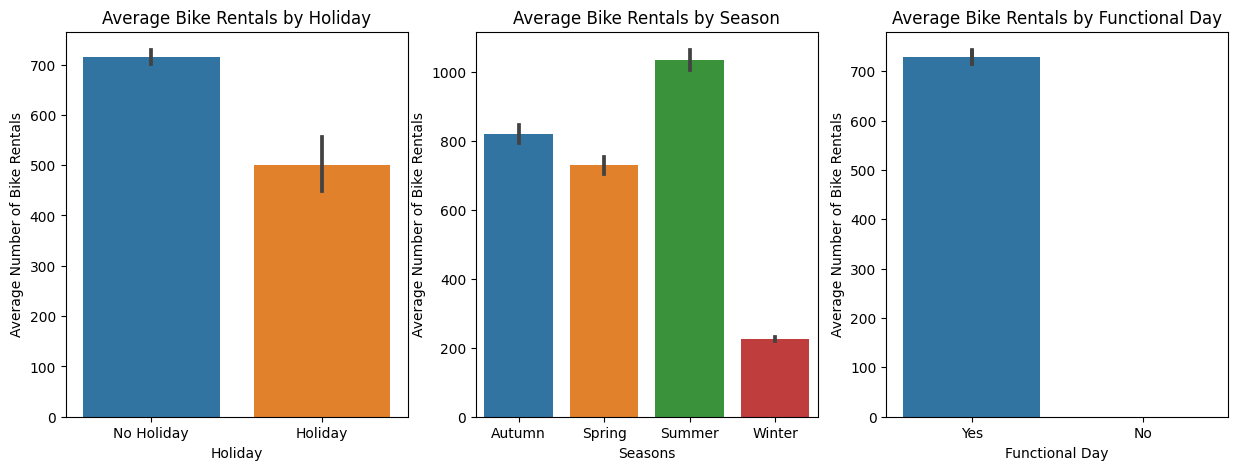

In [16]:
# Chart- Visualization Code
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 5))

# Create a bar plot of the average bike rentals by holiday
sns.barplot(x='Holiday', y='Rented Bike Count', data=df, ax=ax1)
ax1.set_title('Average Bike Rentals by Holiday')
ax1.set_xlabel('Holiday')
ax1.set_ylabel('Average Number of Bike Rentals')

# Create a bar plot of the average bike rentals by season
sns.barplot(x='Seasons', y='Rented Bike Count', data=df, ax=ax2)
ax2.set_title('Average Bike Rentals by Season')
ax2.set_xlabel('Seasons')
ax2.set_ylabel('Average Number of Bike Rentals')

# Create a bar plot of the average bike rentals by functional day
sns.barplot(x='Functioning Day', y='Rented Bike Count', data=df, ax=ax3)
ax3.set_title('Average Bike Rentals by Functional Day')
ax3.set_xlabel('Functional Day')
ax3.set_ylabel('Average Number of Bike Rentals')

# Create a bar plot of the average bike rentals by functional day
sns.barplot(x='Functioning Day', y='Rented Bike Count', data=df, ax=ax3)
ax3.set_title('Average Bike Rentals by Functional Day')
ax3.set_xlabel('Functional Day')
ax3.set_ylabel('Average Number of Bike Rentals')


plt.show()

Insights:
1. On non-holiday days, the average number of bike rentals is 700, whereas on holidays, the average number of rentals is 500.

2. The chart reveals that summer has the highest average bike rentals (1034), followed by autumn (819) and spring (730). Winter has the lowest average rentals (225), indicating a notable seasonal variation in bike rental demand.

3. There is no bike rental on non functional day whereas 730 bikes are rented on functional days.

#### Chart:02  --Total Bike Rentals by Year

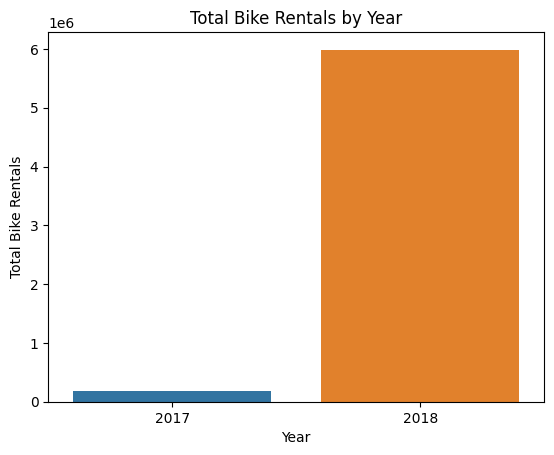

In [17]:
# Chart - 5 visualization code

# Group by year and sum the bike rentals
bike_rentals_yearly = df.groupby('Year')['Rented Bike Count'].sum().reset_index()

# Create a bar plot of the total bike rentals by year
sns.barplot(x='Year', y='Rented Bike Count', data=bike_rentals_yearly)

# Set axis labels and plot title
plt.xlabel('Year')
plt.ylabel('Total Bike Rentals')
plt.title('Total Bike Rentals by Year')

# Show the plot
plt.show()

**Insights**

In 2017, the average number of bikes was **185,330**, while in 2018, the average number of rented bikes increased to **5,986,984.**

#### Chart:03 --Average bike rentals per Month

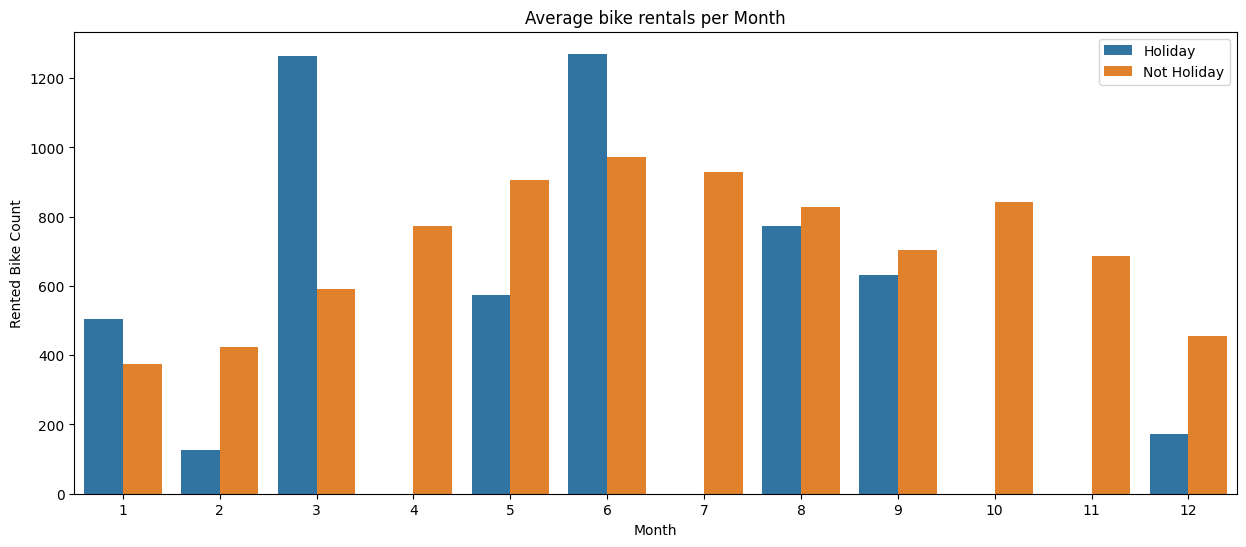

In [18]:
# Chart - 6 visualization code
# Average Monthly Count Distribution plot
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
group_month = df.groupby(['Month', 'Holiday'])['Rented Bike Count'].mean().reset_index()
sns.barplot(data=group_month, x='Month', y='Rented Bike Count', hue='Holiday', ax=axes)
axes.set(xlabel='Month', ylabel='Rented Bike Count', title='Average bike rentals per Month')
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Holiday','Not Holiday'])
plt.show()

1. During holidays, the months of March and June have the highest average bike rentals.
2. In the months of April and July, there are no bike rentals recorded on holidays.
3. February and December experiences the lowest average bike rentals, both on holidays and non-holidays.

#### Chart:04 -- Average Rented bike count for each month

[Text(0.5, 1.0, 'Average Rented bike count for each month')]

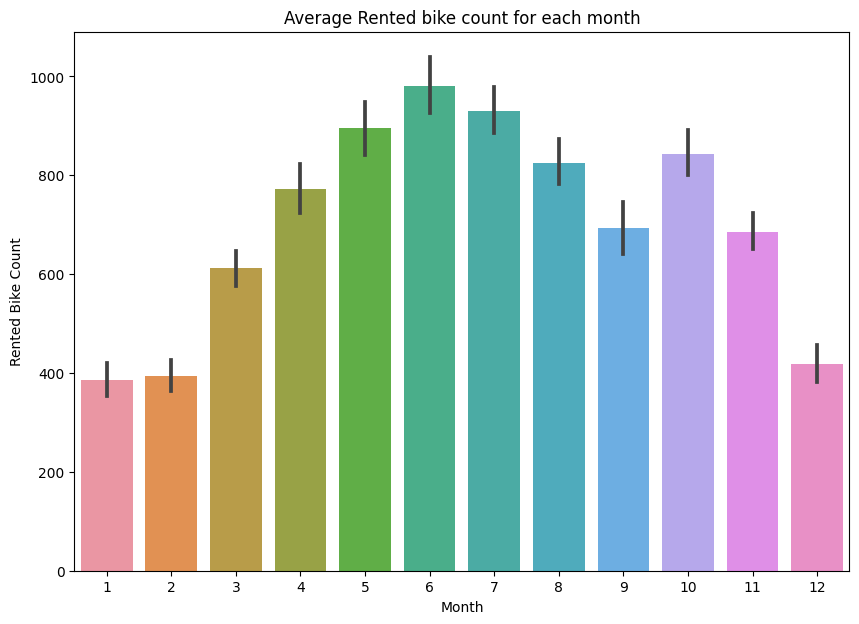

In [19]:
# Chart - 04 visualization code
fig,ax=plt.subplots(figsize=(10,7))
sns.barplot(data=df,x='Month',y='Rented Bike Count',ax=ax)
ax.set(title='Average Rented bike count for each month')


Insights:
1. May, June and July have highest number of average rented bike count.
2. January, February and December have lowest number of average rented bike count.

#### Chart:05-- Rented Bike Count by Hour

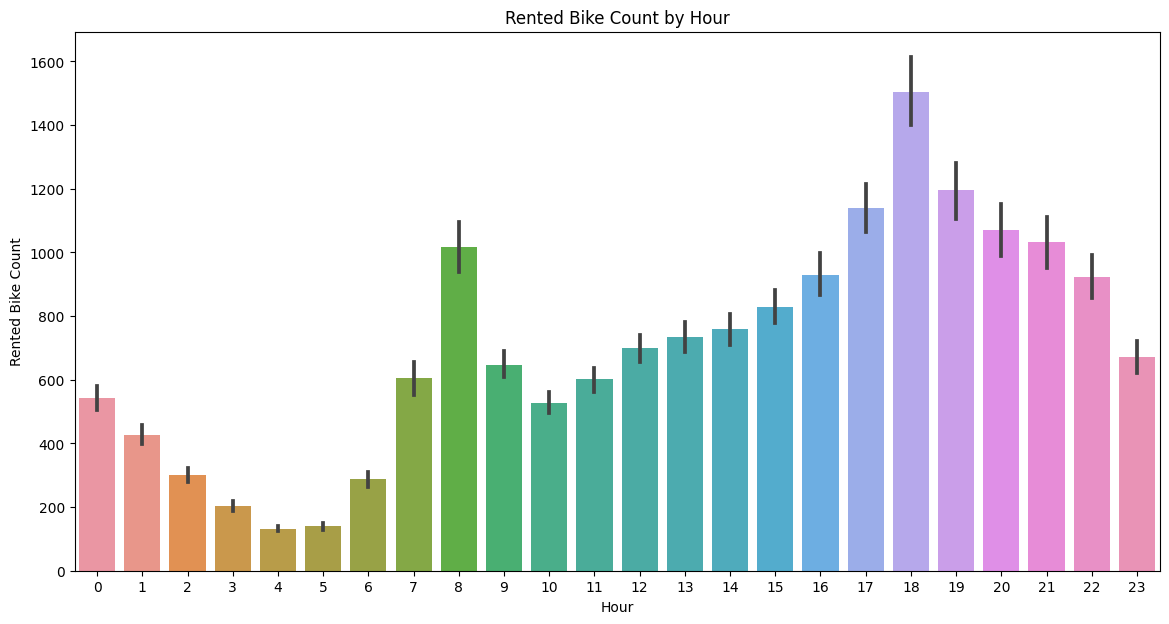

In [20]:
# Chart - 05 visualization code


# Create the bar plot using Seaborn
plt.figure(figsize=(14, 7))
sns.barplot(x='Hour', y='Rented Bike Count', data=df)

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count by Hour')

plt.show()


1. Peak Hours:The bar plot reveals that the demand for rented bikes tends to be higher in the morning, particularly at 8 am, and reaches its peak in the evening around 6 o'clock.

2. Off peak hours: The bar plot clearly shows that the demand for rented bikes is at its lowest during the early hours of 4 and 5 in the morning.

#### Chart:06 -- Average rented bike count percentage distribution by seasons and holiday

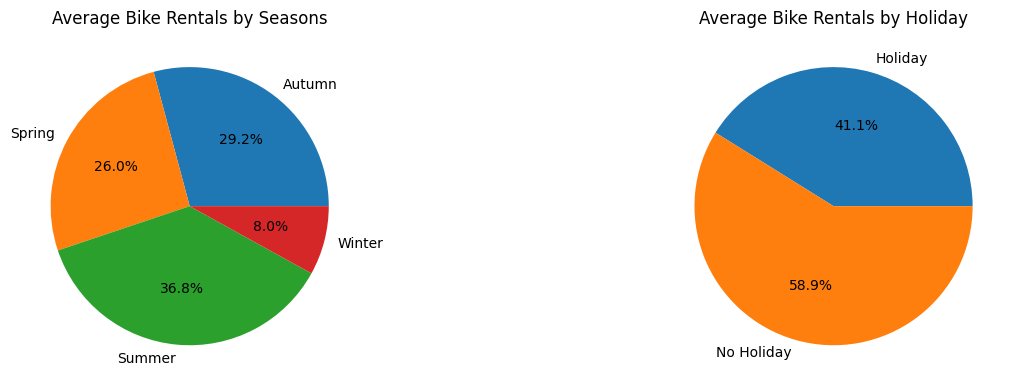

In [21]:
# Chart -06  visualization code

# Calculate the average rented bike count based on categorical variables
avg_counts_seasons = df.groupby('Seasons')['Rented Bike Count'].mean()
avg_counts_holiday = df.groupby('Holiday')['Rented Bike Count'].mean()

# Create pie charts for each categorical variable
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Pie chart for Seasons
axes[0].pie(avg_counts_seasons, labels=avg_counts_seasons.index, autopct='%1.1f%%')
axes[0].set_title('Average Bike Rentals by Seasons')

# Pie chart for Holiday
axes[1].pie(avg_counts_holiday, labels=avg_counts_holiday.index, autopct='%1.1f%%')
axes[1].set_title('Average Bike Rentals by Holiday')


plt.tight_layout()
plt.show()



Insights:
1. On an average, the highest bike rentals occur during the summer season, while the lowest rentals are observed during the winter season.

2. The majority (58.9%) of bike rentals occur when there are no holidays.

#### Chart:07 -- Bike Count with reference to temperature.

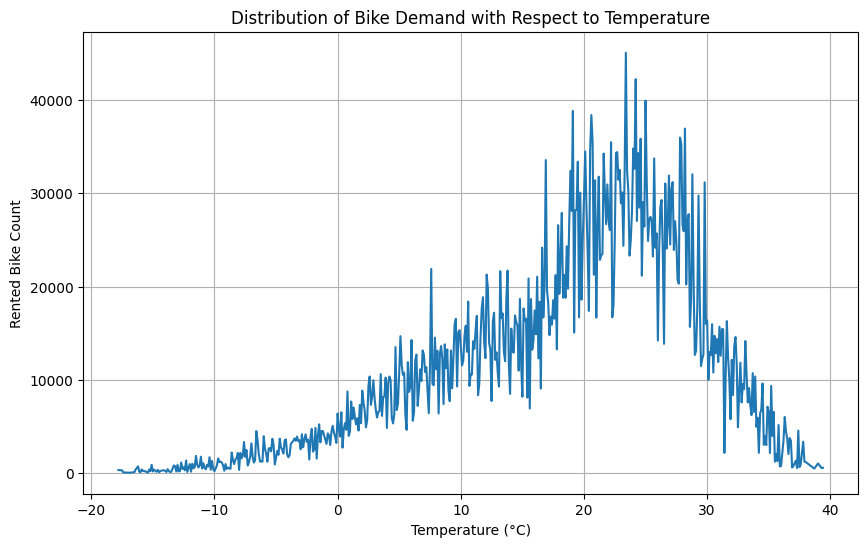

In [22]:

# Calculate the total rented bike count for each temperature
counts_temp = df.groupby('Temperature(°C)')['Rented Bike Count'].sum()

# Plot the distribution of bike demand with respect to temperature
plt.figure(figsize=(10, 6))
plt.plot(counts_temp.index, counts_temp.values)
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.title('Distribution of Bike Demand with Respect to Temperature')
plt.grid(True)
plt.show()

Insights:


1. Majority of bikes were rented when temperature varries from 15°C to 30°C.
2. Very few bikes were rented when temperature is negative(i.e. Snowfall).

#### Chart:08 -- Bike Count with reference to Humidity.

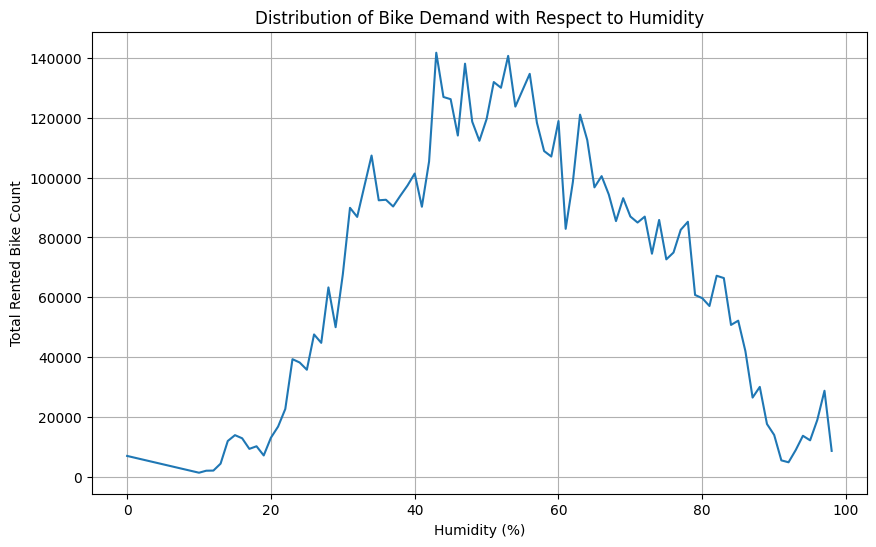

In [23]:
# Calculate the total rented bike count for each humidity range
bike_counts_humidity = df.groupby('Humidity(%)')['Rented Bike Count'].sum()

# Plot the distribution of bike demand with respect to humidity
plt.figure(figsize=(10, 6))
plt.plot(bike_counts_humidity.index, bike_counts_humidity.values)
plt.xlabel('Humidity (%)')
plt.ylabel('Total Rented Bike Count')
plt.title('Distribution of Bike Demand with Respect to Humidity')
plt.grid(True)
plt.show()


1. When humidity percentages varries from 40 to 70 the total rented bike count is more.

# ***5. Data Vizualization Analysis***

### **5.1 Univariate Analysis**

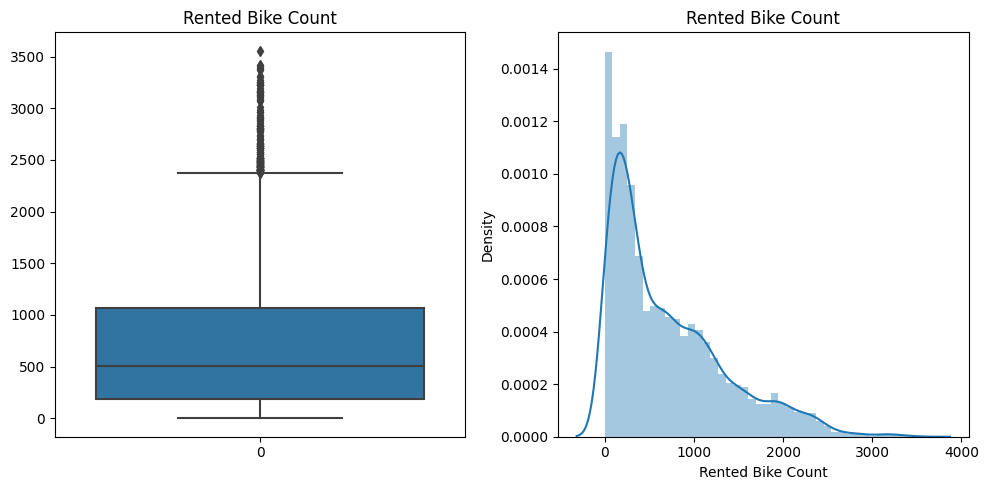

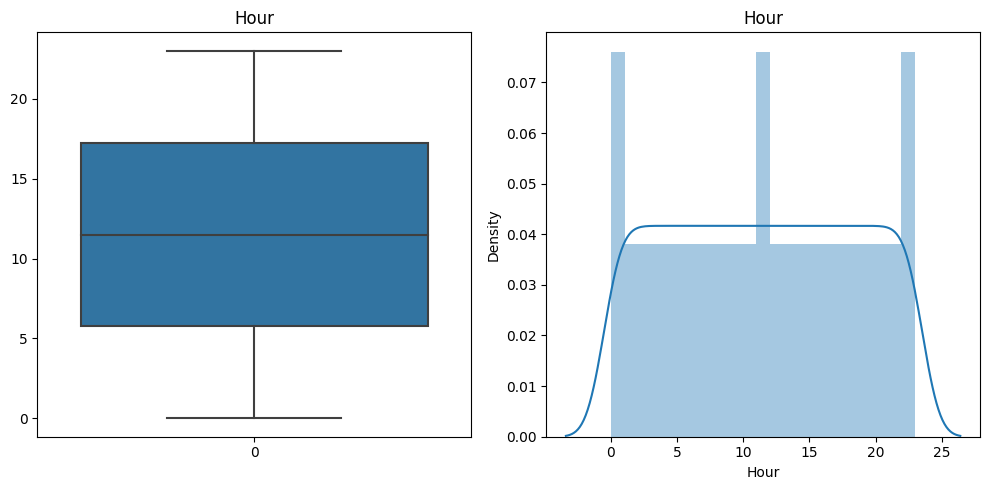

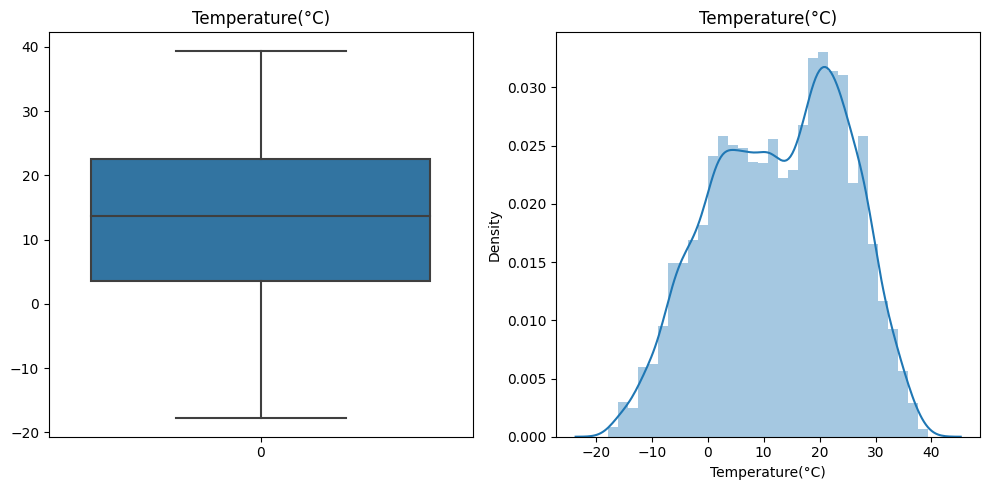

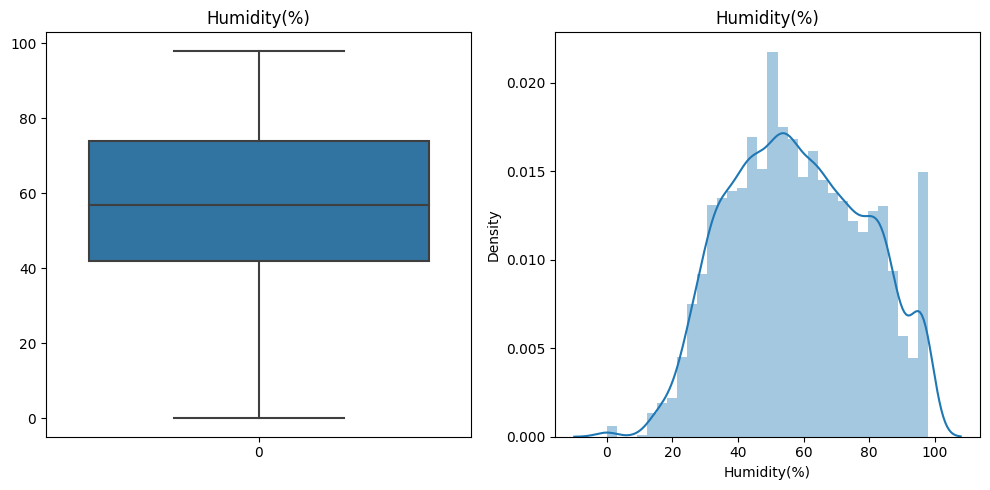

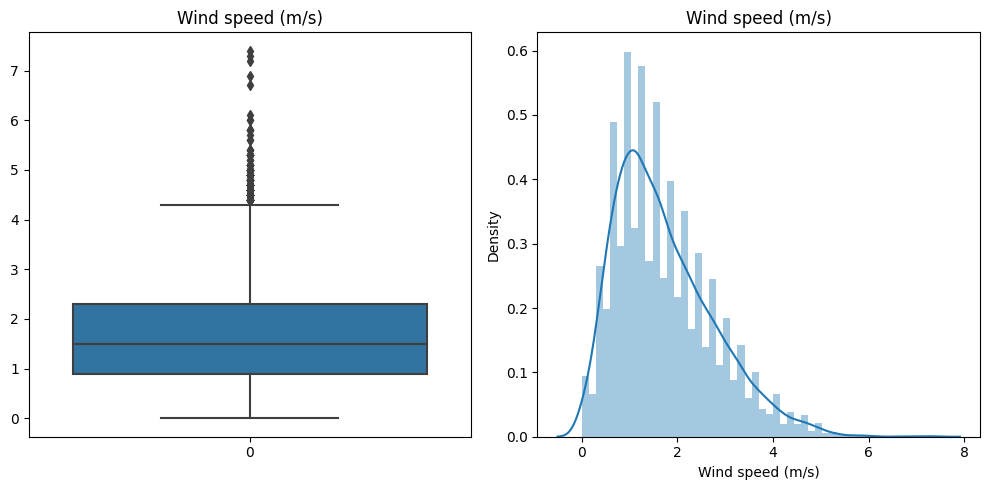

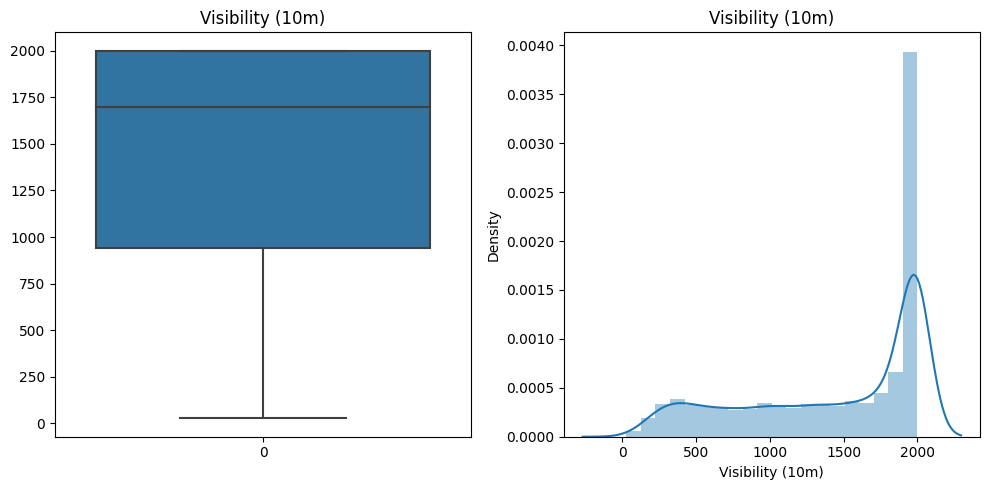

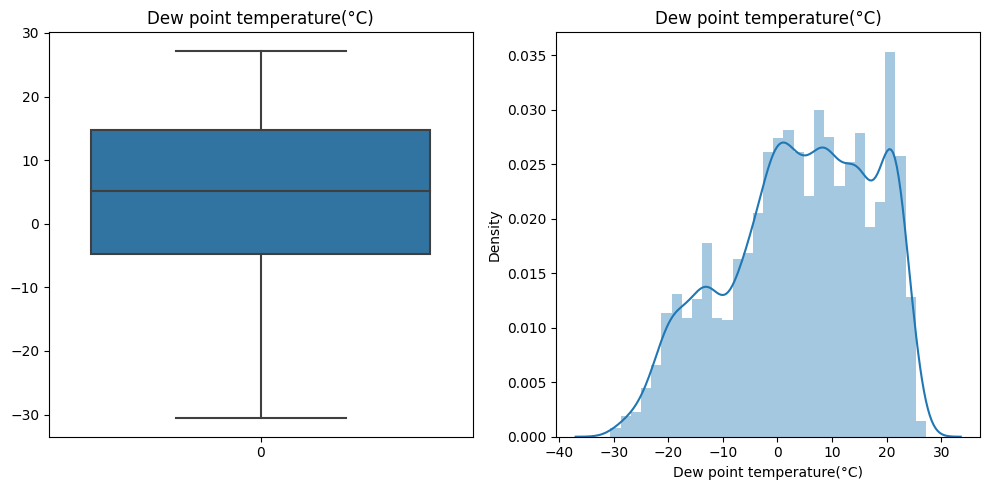

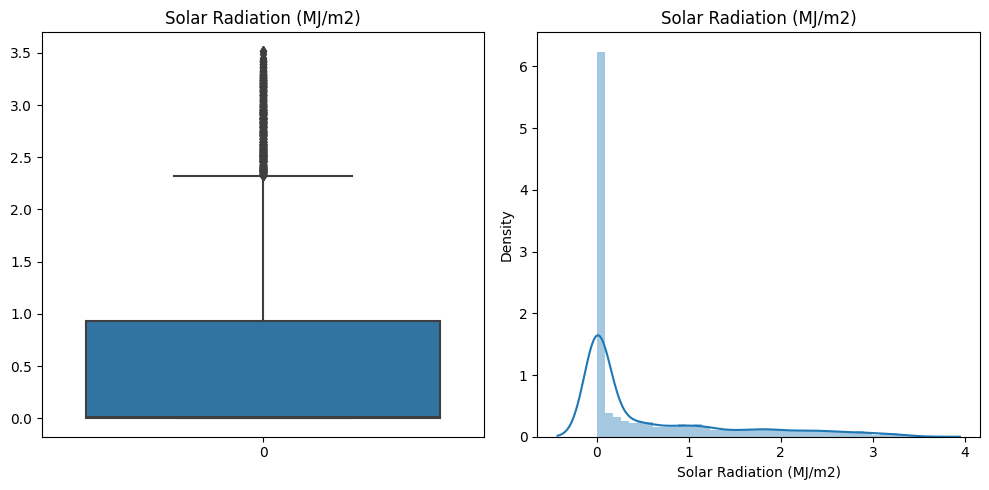

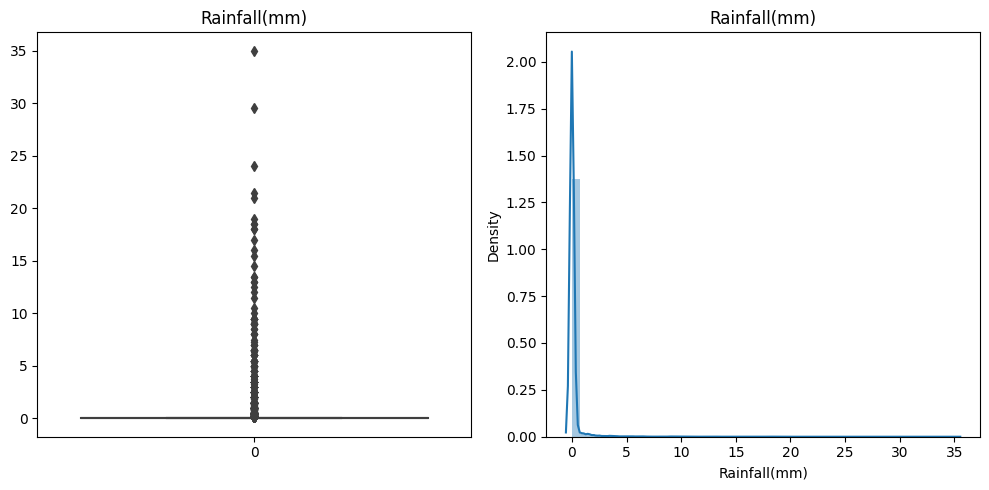

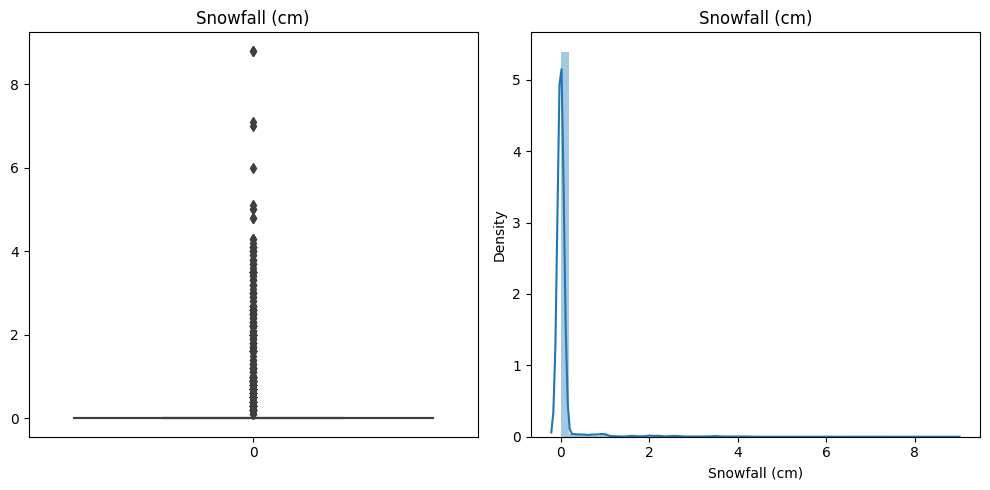

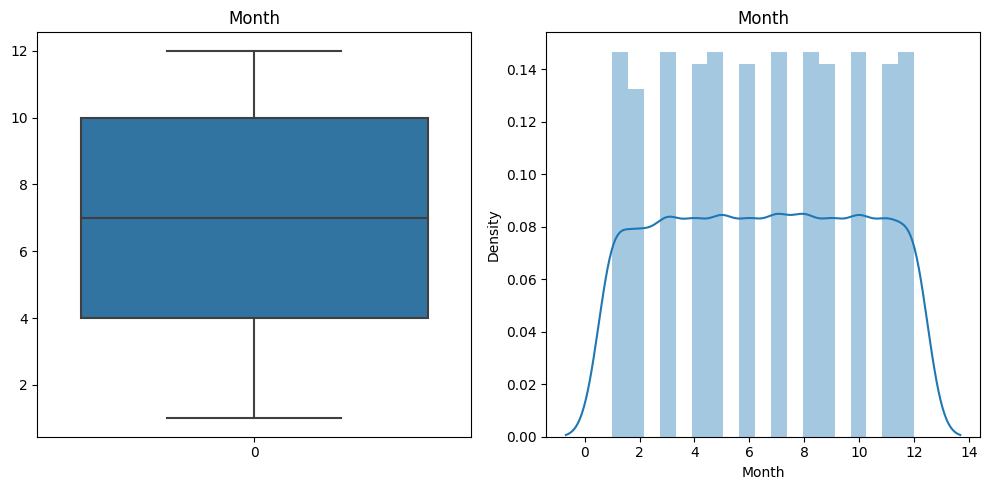

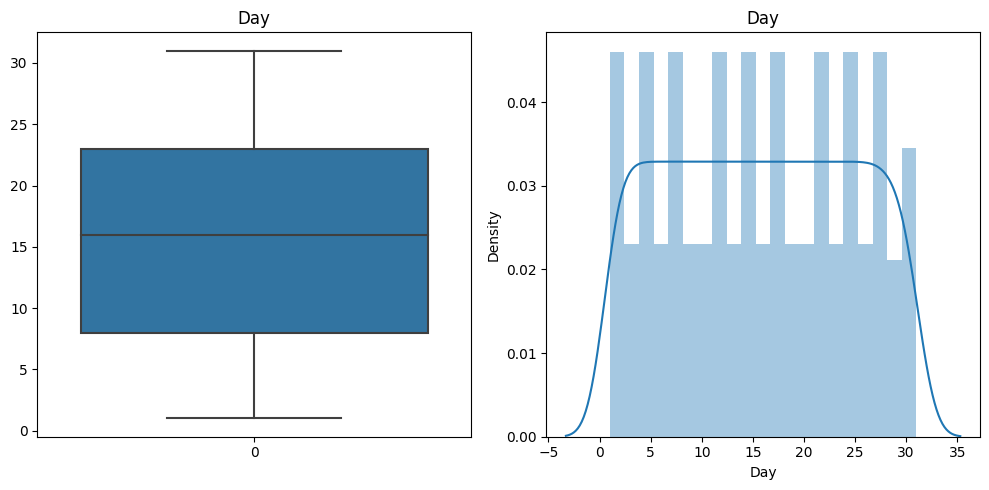

In [24]:
# Perform Univariate Analysis on modified dataframe df
for col in numerical_features.columns.to_list():
  #poltting boxplot
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(df[col])
    fig.set_title(col)
  #Plotting displot
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[col])
    fig.set_title(col)
    plt.tight_layout()
    plt.show()

Insights:

1. Outliers are observed in variables such as Rented Bike Count, Wind Speed, Solar Radiation, Rainfall, and Snowfall.

### 5.2 Bi-variate analysis

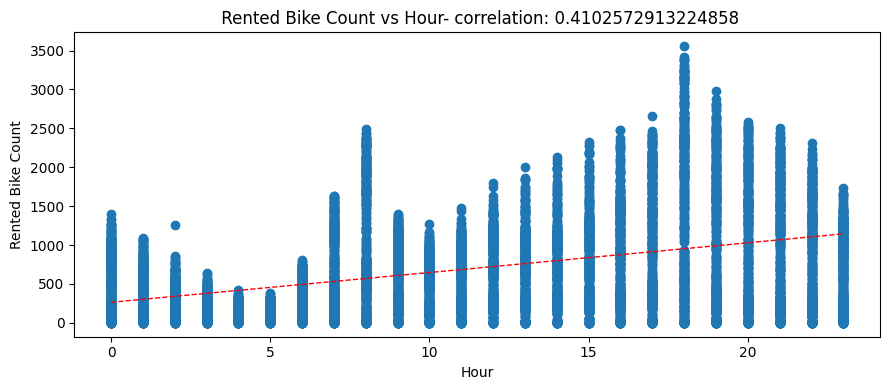

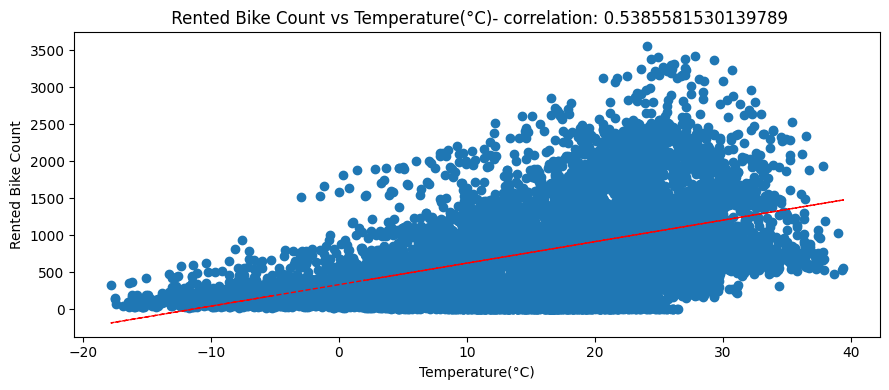

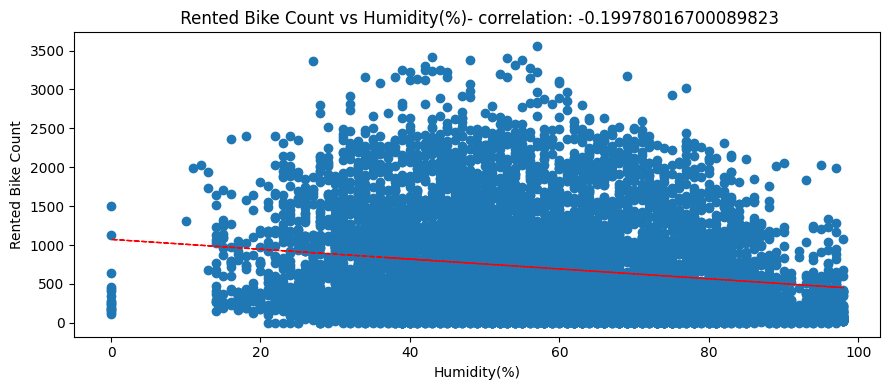

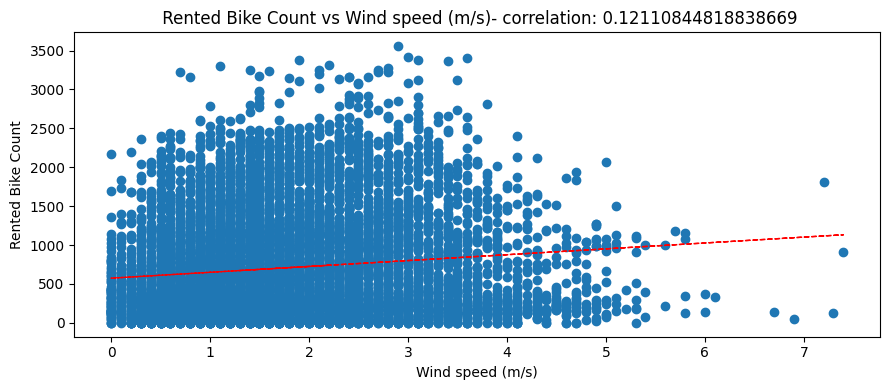

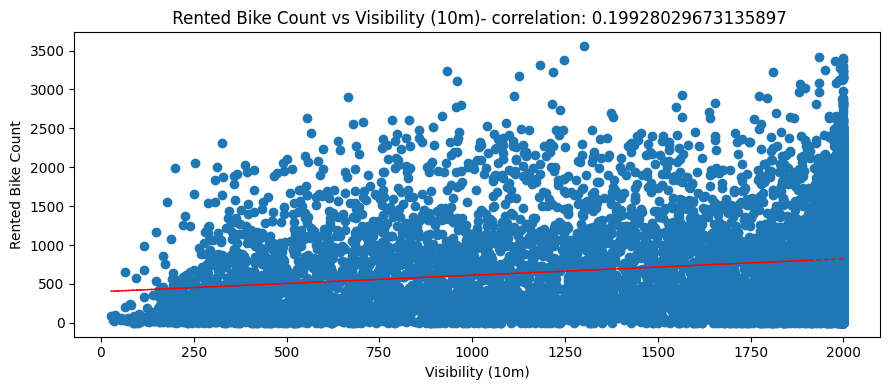

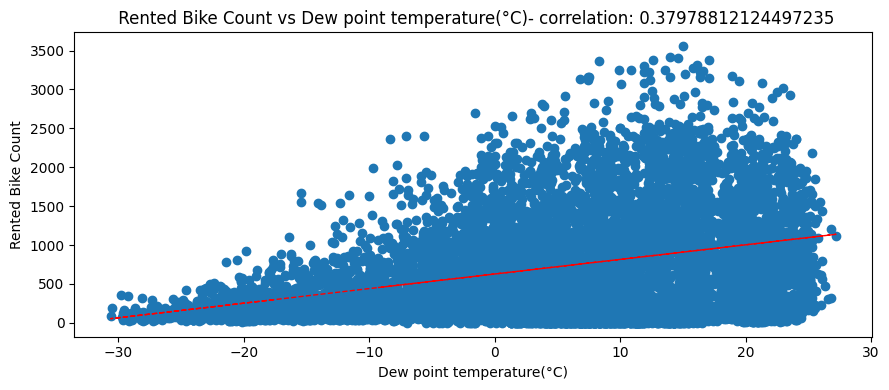

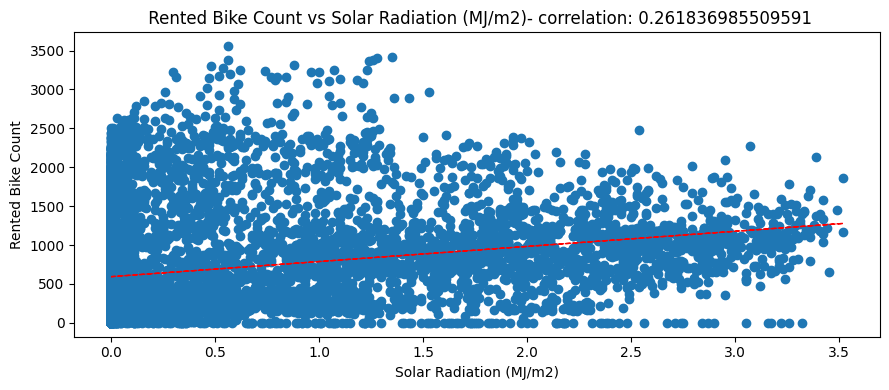

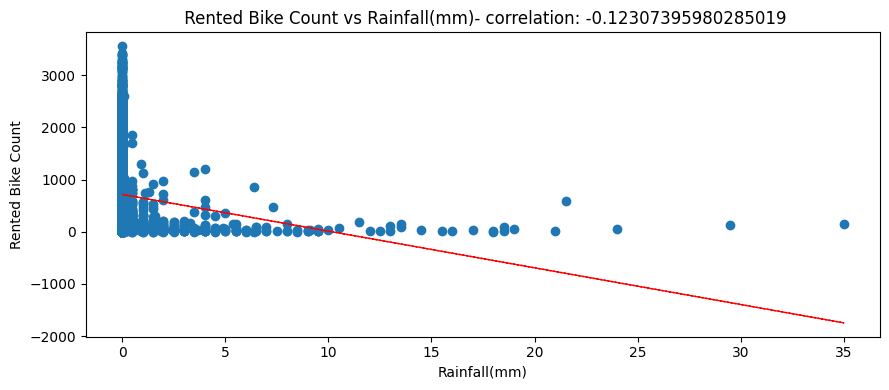

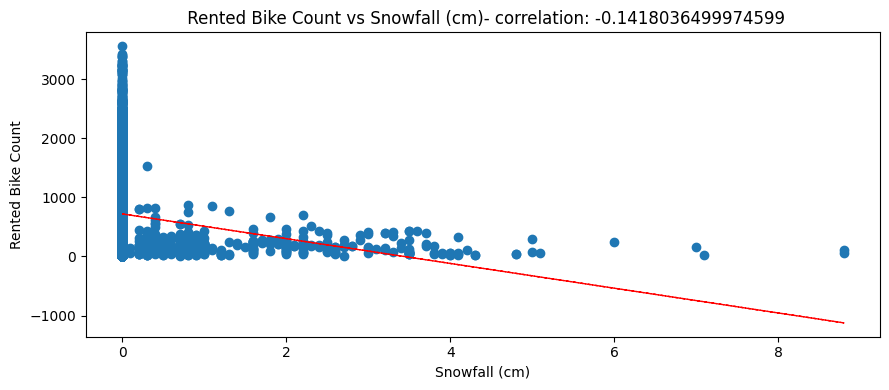

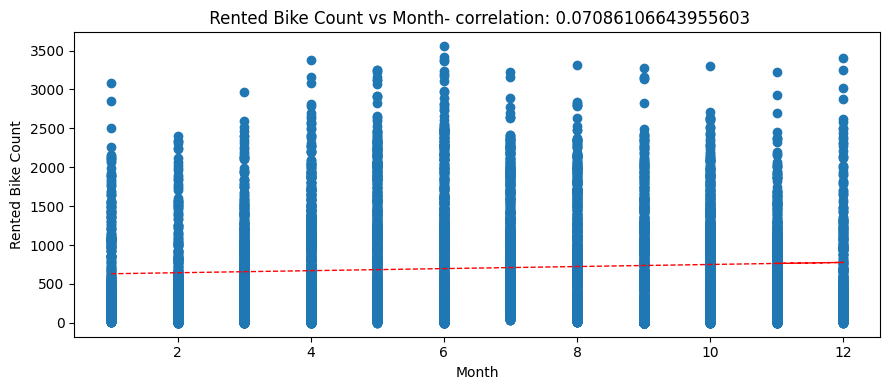

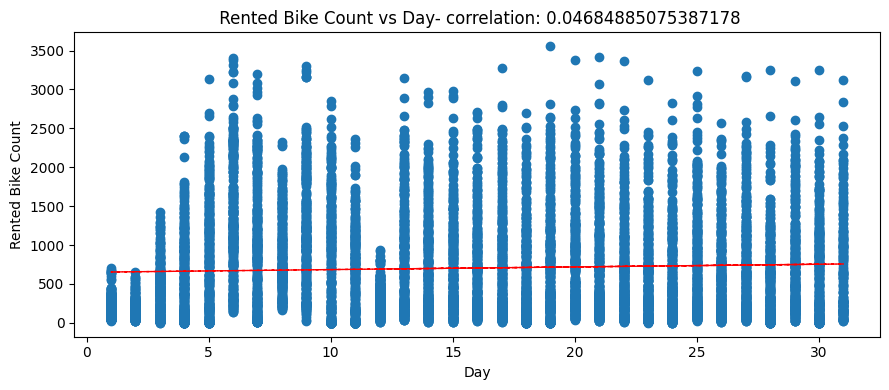

In [25]:
# Cheking Relation Between Dependent and independent variables with correlation

for col in numerical_features.columns.to_list()[1:]:
  fig = plt.figure(figsize=(9,4))
  ax = fig.gca()
  feature = df[col]
  label = df['Rented Bike Count']

# Correlation Between Features 
  correlation = feature.corr(label)
  
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Rented Bike Count')

#  Naming Every plot with correlation between variables
  ax.set_title(' Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(df[col], df['Rented Bike Count'], 1)
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, "r--", lw=1)
  plt.tight_layout()
  plt.show()
     

Insight:
1. Hour and Temperature are positively correlated with rented bike count.
2. Humidity,Snowfall & Rainfall are negative correlated as compared to other variables.

In [26]:
# Finding correlation factor for other variables vs rented bike count
correlation_df = df.corr()['Rented Bike Count'].drop('Rented Bike Count')

# Renaming the 'Rented Bike Count' column as 'correlation factor'
correlation_df.rename('correlation factor', inplace=True)

# Reset index and sort values by 'correlation factor' in descending manner
correlation_df = correlation_df.reset_index().rename(columns={'index': 'variable'}).sort_values(by='correlation factor',ascending=False)

# showing correlation coefficients
correlation_df


,variable,correlation factor
1,Temperature(°C),0.538558
0,Hour,0.410257
5,Dew point temperature(°C),0.379788
6,Solar Radiation (MJ/m2),0.261837
4,Visibility (10m),0.199280
3,Wind speed (m/s),0.121108
9,Month,0.070861
10,Day,0.046849
7,Rainfall(mm),-0.123074
8,Snowfall (cm),-0.141804


### 5.3 Multivariate analysis

<Axes: >

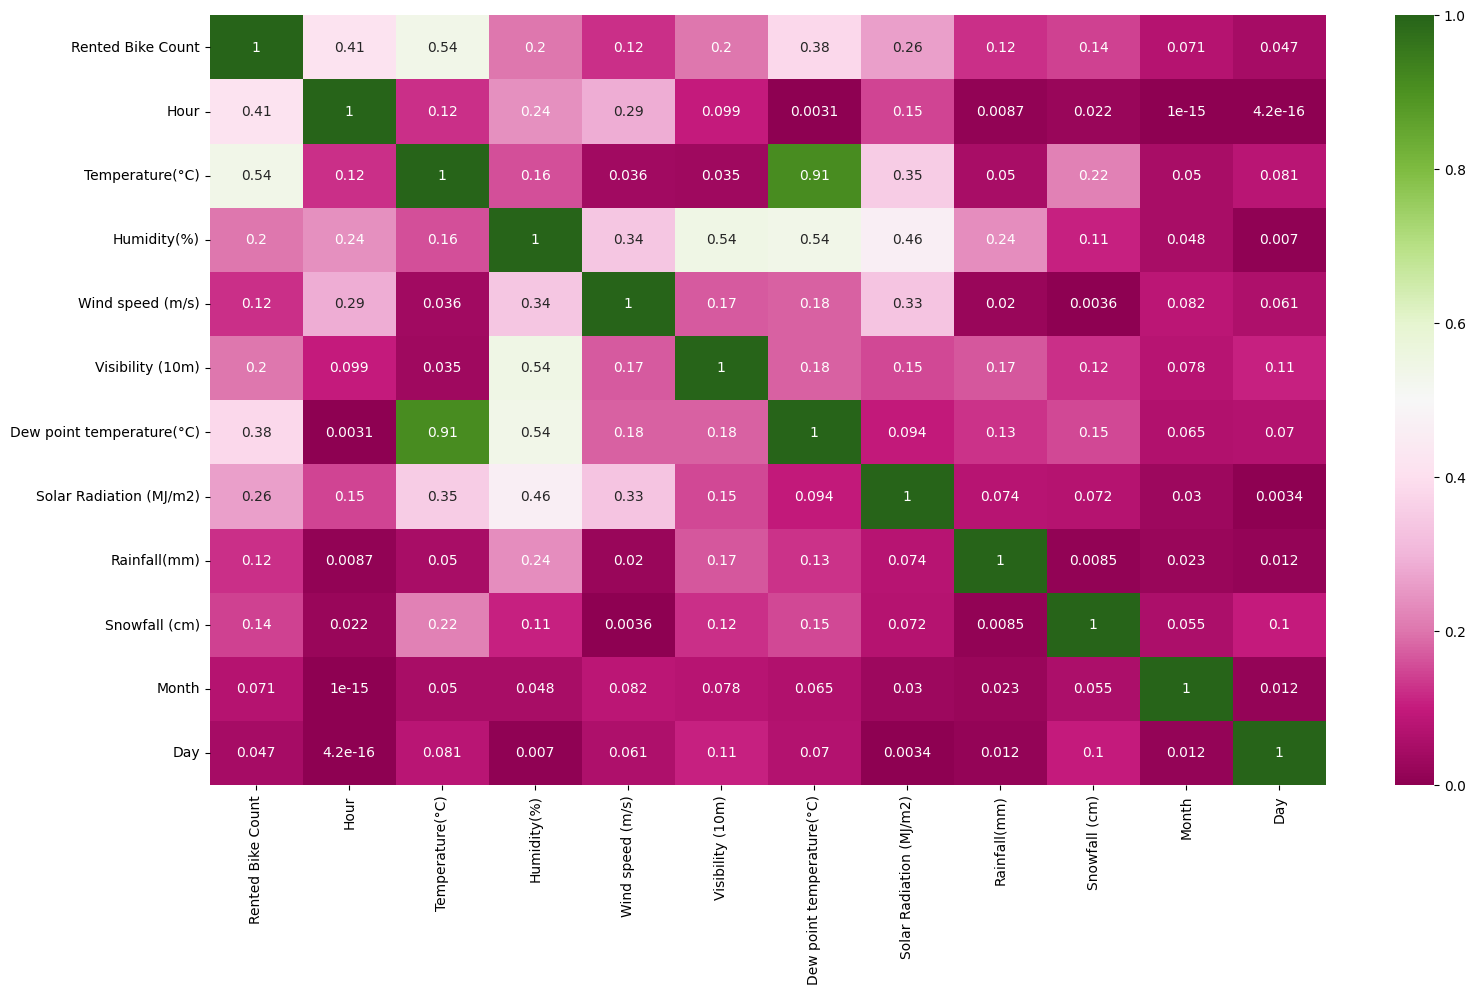

In [27]:
# Chart - 3 visualization code
 ## Correlation for df dataframe
plt.figure(figsize=(18,10))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='PiYG')

Insights:
1. The heatmap shows that Temperature and Dew point temperature have a strong positive correlation, suggesting the presence of multicollinearity between these variables.
2. Hour and Temperature exhibit a strong correlation with the output variable, indicating their significance for further analysis.

###5.4 Finding Multicollinearity

Multicollinearity refers to a situation in which independent variables in a regression model are highly correlated with each other. It creates issues in interpreting the individual effects of variables and can lead to unstable coefficients and reduced model accuracy. Addressing multicollinearity involves identifying correlated variables and taking steps such as removing or transforming variables.

In [28]:
#checking Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [29]:
#checking multicolinarity for df
calc_vif(df[[i for i in df.describe().columns]])

,variables,VIF
0,Rented Bike Count,4.148660
1,Hour,5.044930
2,Temperature(°C),41.080157
3,Humidity(%),8.541724
4,Wind speed (m/s),4.838949
5,Visibility (10m),9.436885
6,Dew point temperature(°C),19.969124
7,Solar Radiation (MJ/m2),2.937426
8,Rainfall(mm),1.105101
9,Snowfall (cm),1.141267


In [30]:
# Finding the VIF for other variables except 'Temperature(°C)','Humidity','Visibility (10m)','Dew point temperature(°C)'
calc_vif(df[[i for i in df.describe().columns if i not in ['Temperature(°C)','Humidity','Visibility (10m)','Dew point temperature(°C)']]])

,variables,VIF
0,Rented Bike Count,2.919428
1,Hour,4.588903
2,Humidity(%),5.512573
3,Wind speed (m/s),4.011388
4,Solar Radiation (MJ/m2),1.831175
5,Rainfall(mm),1.080323
6,Snowfall (cm),1.074329
7,Month,4.158901
8,Day,3.776836


Here we got variables having VIF less than 10, now we proceed with outliers.

# 6. Handling Outlier

### 6.1. Handling Outliers

In [31]:
# Handling Outliers & Outlier treatments
# From Univariate Analysis, we have detected quite a bit of outliers in dataframe, we created a fuction to which returns  list of columns containing outliers

def list_of_outlier_columns(data):
 # Define the IQR range for outlier
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
 # Blank list
    outlier_columns = []

    for col in data.columns:
     # Find the lower and upper bounds for outlier detection
      lower_limit = Q1[col] - 1.5 * IQR[col]
      upper_limit = Q3[col] + 1.5 * IQR[col]
      if any(data[col] > upper_limit) or any(data[col] < lower_limit):
          outlier_columns.append(col)
    return outlier_columns

In [32]:
#Returing list of variables containing outliers and their aggregate numbers for df dataframe

print(f"For dataframe df list of outliers are {list_of_outlier_columns(numerical_features)}")

#printing counts of outliers columns
print(f"The Numbers of columns with ourliers are {len(list_of_outlier_columns(numerical_features))} out of {len(numerical_features.columns)}")

For dataframe df list of outliers are ['Rented Bike Count', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
The Numbers of columns with ourliers are 5 out of 12


In [33]:
# list of all the variables having outliers presence.
list_of_outlier=list_of_outlier_columns(numerical_features)
print(list_of_outlier)

['Rented Bike Count', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


In [34]:
# Create fuction to find skewness of each variable in dataframe
def skewness_of_df(data):
  skewness_of_columns = []
  for col in data.columns:
    skewness_of_columns.append((col, data[col].skew()))
    skewness_df = pd.DataFrame(skewness_of_columns, columns=['Column', 'Skewness'])
  return skewness_df


In [35]:
# Checking skewness of numerical features
skewness_of_df(numerical_features)

,Column,Skewness
0,Rented Bike Count,1.153428
1,Hour,0.000000
2,Temperature(°C),-0.198326
3,Humidity(%),0.059579
4,Wind speed (m/s),0.890955
5,Visibility (10m),-0.701786
6,Dew point temperature(°C),-0.367298
7,Solar Radiation (MJ/m2),1.504040
8,Rainfall(mm),14.533232
9,Snowfall (cm),8.440801


To address the issue of highly skewed features in both right and left directions, we will proceed with the winsorization method. 

Winsorization is a technique used to limit the extreme values of a variable by replacing them with less extreme values.

In [36]:
#create a function to apply winsorization to specific columns in a DataFrame.

def apply_winsorization(dataframe, columns, lower_limit, upper_limit):
  
    # Create a copy of the DataFrame to avoid modifying the original
    df = dataframe.copy()  
    
    for column in columns:
        column_data = df[column]
        lower_quantile = np.percentile(column_data, lower_limit * 100)
        upper_quantile = np.percentile(column_data, upper_limit * 100)
        column_data = np.where(column_data < lower_quantile, lower_quantile, column_data)
        column_data = np.where(column_data > upper_quantile, upper_quantile, column_data)
        df[column] = column_data
    
    return df

In [37]:
# Applying Winsorization to outlier variables present in numerical features
winsorized_numerical_features=apply_winsorization(numerical_features, list_of_outlier, 0.01,0.99)
winsorized_numerical_features.describe([0.75,0.95,0.99]).T

,count,mean,std,min,50%,75%,95%,99%,max
Rented Bike Count,8760.0,700.848315,632.612792,0.0,504.50,1065.25,2043.000,2525.5043,2526.23
Hour,8760.0,11.500000,6.922582,0.0,11.50,17.25,22.000,23.0000,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,13.70,22.50,30.700,35.1000,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,57.00,74.00,94.000,97.0000,98.00
Wind speed (m/s),8760.0,1.720959,1.018261,0.1,1.50,2.30,3.700,4.7000,4.70
Visibility (10m),8760.0,1436.825799,608.298712,27.0,1698.00,2000.00,2000.000,2000.0000,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,5.10,14.80,22.405,24.7000,27.20
Solar Radiation (MJ/m2),8760.0,0.567985,0.865253,0.0,0.01,0.93,2.560,3.1700,3.17
Rainfall(mm),8760.0,0.097260,0.512681,0.0,0.00,0.00,0.400,4.0000,4.00
Snowfall (cm),8760.0,0.064292,0.335162,0.0,0.00,0.00,0.200,2.5000,2.50


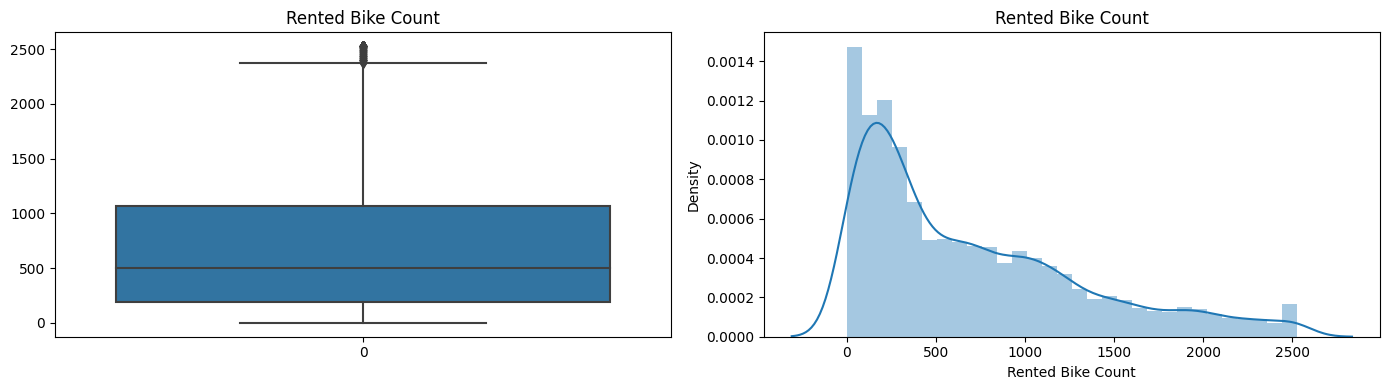

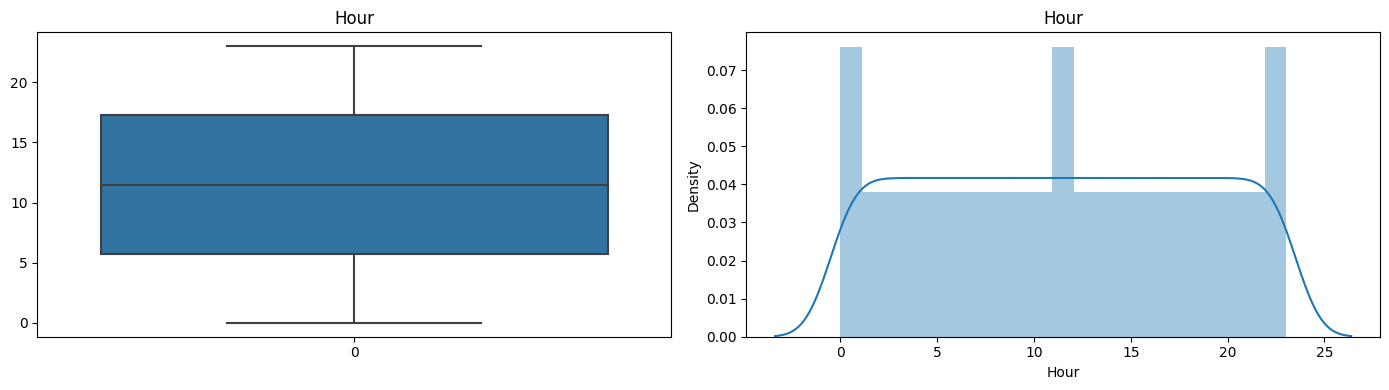

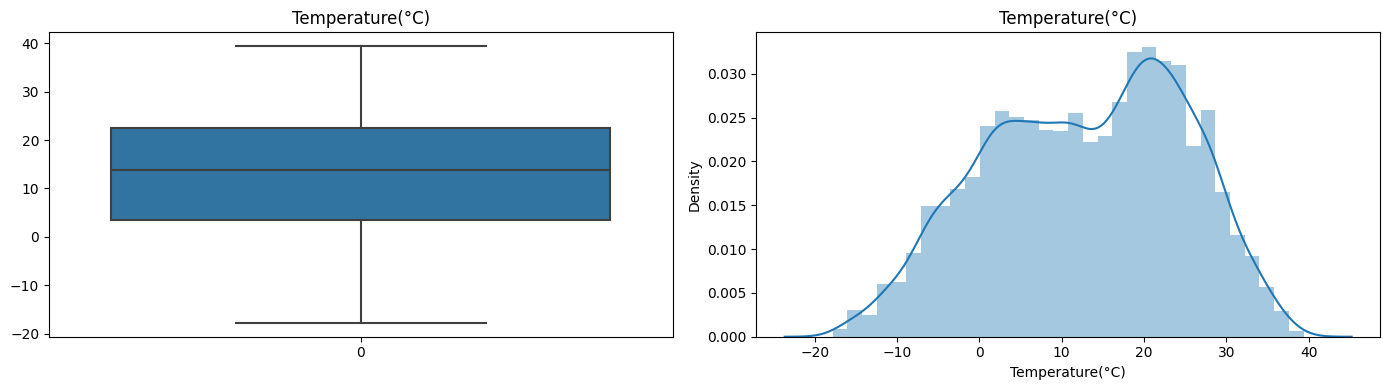

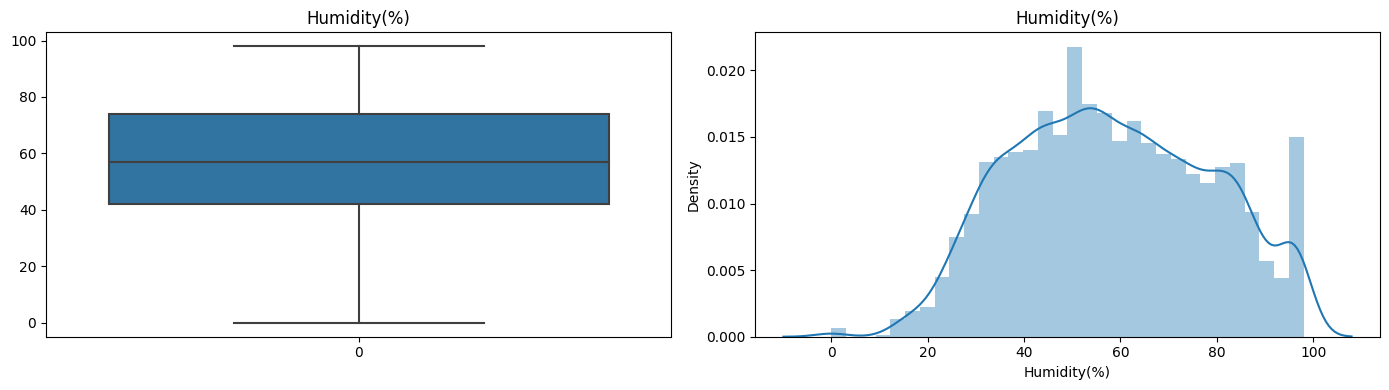

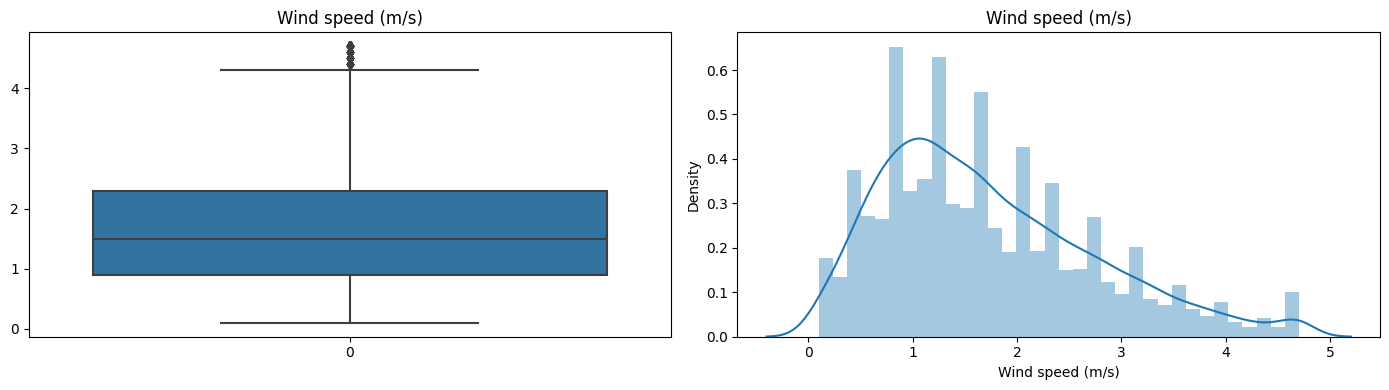

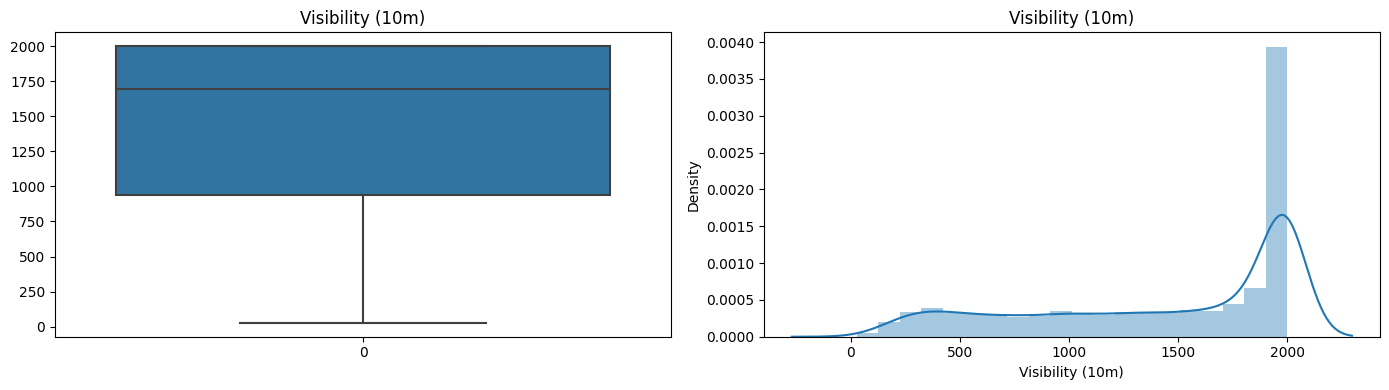

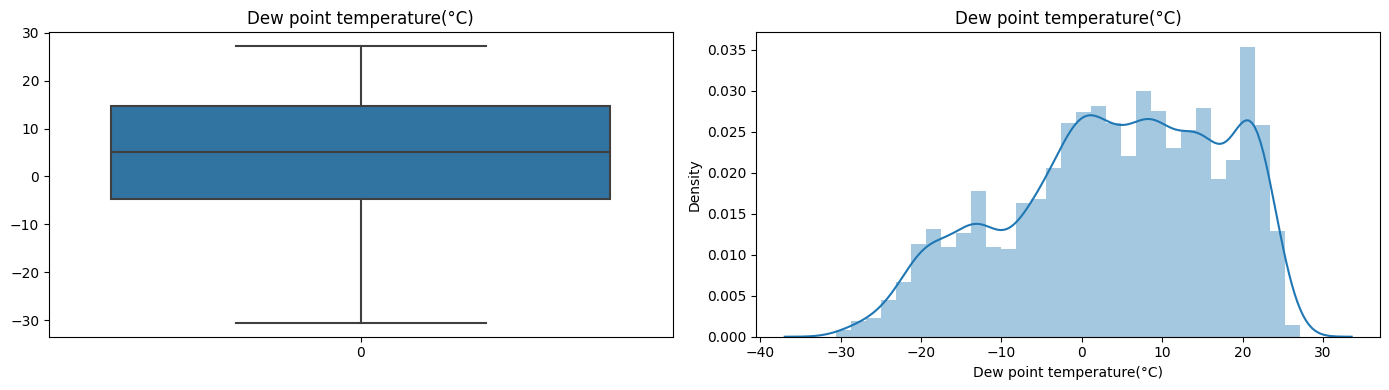

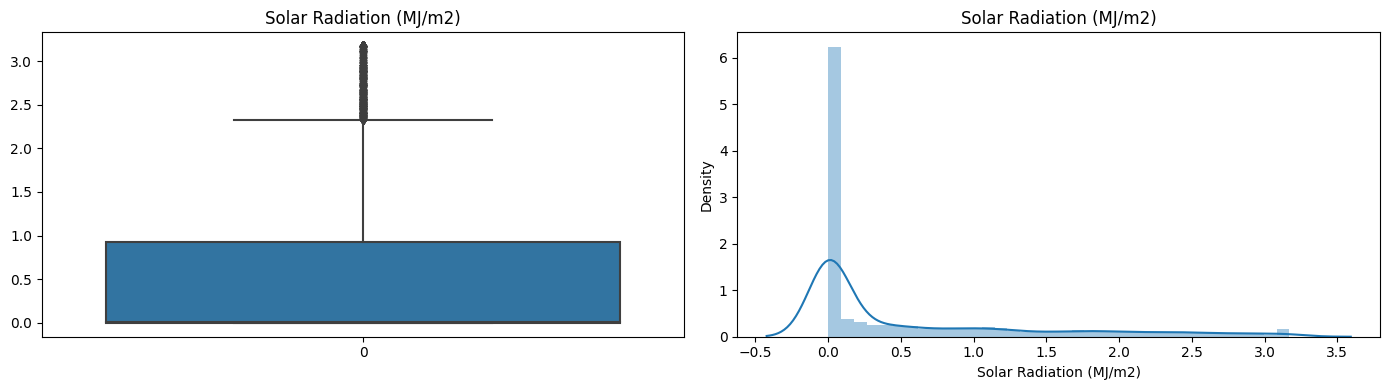

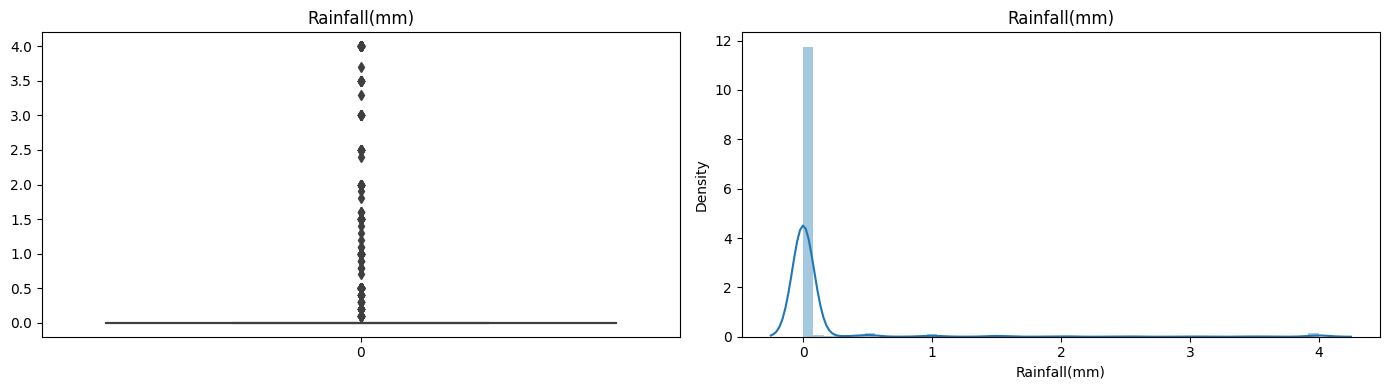

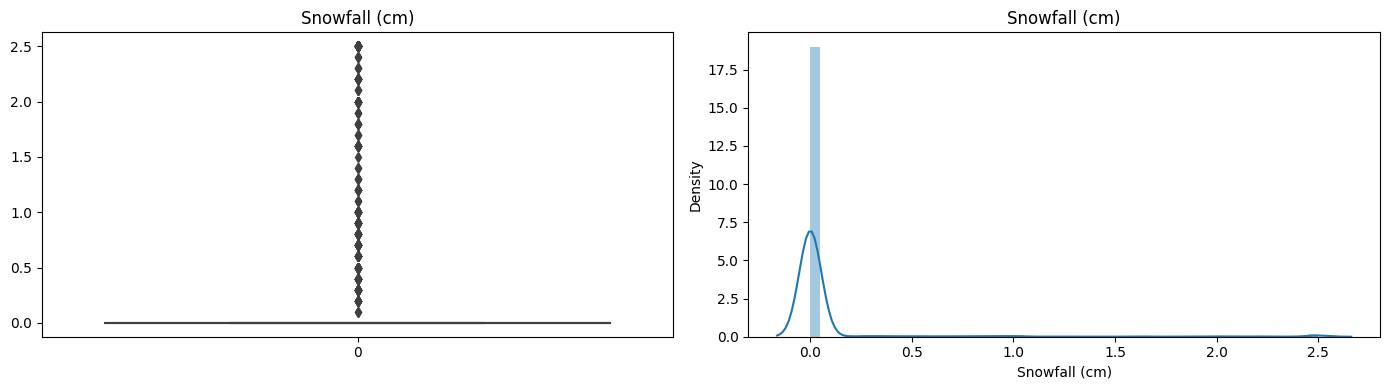

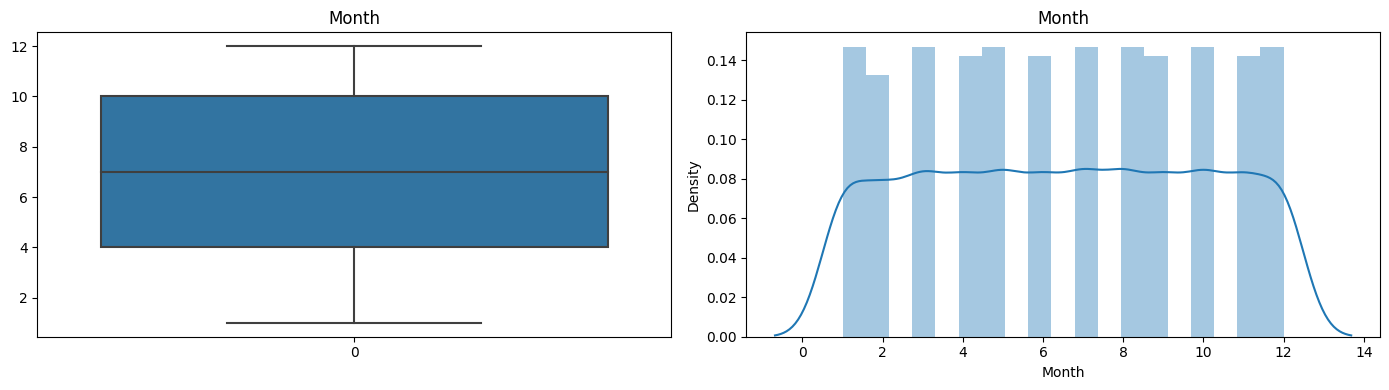

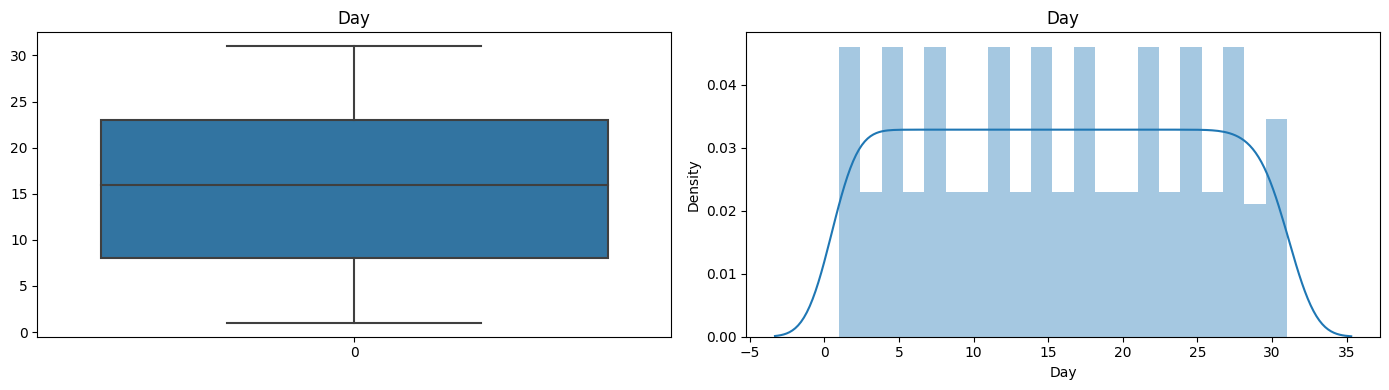

In [38]:
#Perform Univariate Analysis on winsorized_numerical_features to check the presece of outliers and distribution
for col in winsorized_numerical_features.columns.to_list():
  #poltting boxplot
    plt.figure(figsize=(14,4))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(winsorized_numerical_features[col])
    fig.set_title(col)
  #Plotting displot
    plt.subplot(1, 2, 2)
    fig = sns.distplot(winsorized_numerical_features[col])
    fig.set_title(col)
    plt.tight_layout()
    plt.show()

In [39]:
# comparing skewness of original dataset with winsorized_numerical_features dataset
skewness_of_df = pd.DataFrame({'Original Dataset': numerical_features.skew(), 'winsorized': winsorized_numerical_features.skew()})

# Display the resulting table
print("Skewness for different DataFrames")
skewness_of_df

Skewness for different DataFrames


,Original Dataset,winsorized
Rented Bike Count,1.153428,1.040999
Hour,0.000000,0.000000
Temperature(°C),-0.198326,-0.198326
Humidity(%),0.059579,0.059579
Wind speed (m/s),0.890955,0.779051
Visibility (10m),-0.701786,-0.701786
Dew point temperature(°C),-0.367298,-0.367298
Solar Radiation (MJ/m2),1.504040,1.488480
Rainfall(mm),14.533232,6.304076
Snowfall (cm),8.440801,5.995525


After applying winsorization on numberical features still there is skewness present in some features which we will remove by data transformation and normalization.

# 7. Data Transformation and Normalization

In [40]:
# still there is some skewness present in winsorized_numerical_features dataset heere we need Data transformation
# Applying power transformation to numeric features
power_transformer = PowerTransformer(method='yeo-johnson')
transformed_df = power_transformer.fit_transform(winsorized_numerical_features)

# converting the transformed data in dataframe
transformed_df = pd.DataFrame(transformed_df,columns=winsorized_numerical_features.columns.to_list())

# Printing the transformed dataset
transformed_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Day
0,-0.533401,-1.902967,-1.524521,-1.038829,0.624488,0.978214,-1.556854,-0.845837,-0.252993,-0.230787,-1.724452,-0.338744
1,-0.680232,-1.654871,-1.550870,-0.986482,-0.933172,0.978214,-1.556854,-0.845837,-0.252993,-0.230787,-1.724452,-0.338744
2,-0.783297,-1.440263,-1.594819,-0.934363,-0.646781,0.978214,-1.563069,-0.845837,-0.252993,-0.230787,-1.724452,-0.338744
3,-1.051193,-1.244866,-1.612409,-0.882465,-0.786142,0.978214,-1.556854,-0.845837,-0.252993,-0.230787,-1.724452,-0.338744
4,-1.203792,-1.062616,-1.594819,-1.091410,0.707362,0.978214,-1.618915,-0.845837,-0.252993,-0.230787,-1.724452,-0.338744
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.700166,1.050241,-0.715942,-1.197308,0.941463,0.762392,-1.096786,-0.845837,-0.252993,-0.230787,1.249524,1.502539
8756,0.405645,1.170220,-0.783248,-1.038829,0.707362,0.978214,-1.071138,-0.845837,-0.252993,-0.230787,1.249524,1.502539
8757,0.308280,1.288636,-0.850709,-0.934363,-1.821020,0.912535,-1.071138,-0.845837,-0.252993,-0.230787,1.249524,1.502539
8758,0.333900,1.405578,-0.892966,-0.830782,-0.646781,0.692237,-1.064717,-0.845837,-0.252993,-0.230787,1.249524,1.502539


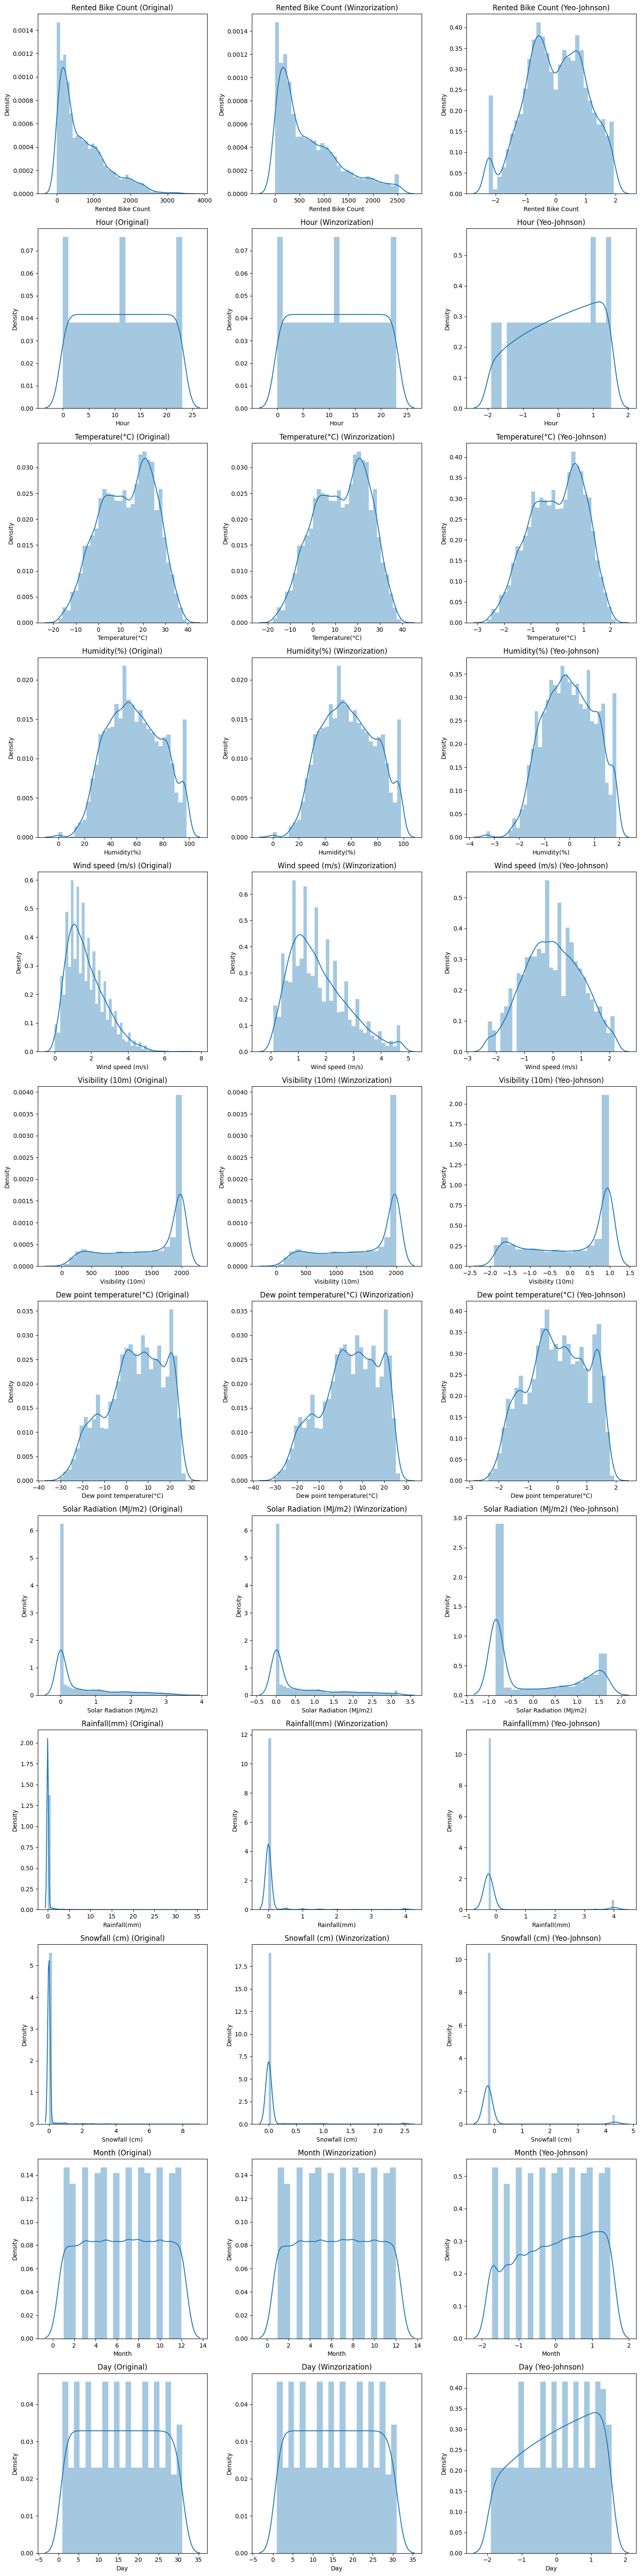

In [41]:
# Visualise the distribution of features with various dataframes

# Set up the figure
fig, axes = plt.subplots(len(numerical_features.columns), 3, figsize=(15, 5*len(numerical_features.columns)))

# Plot the distplots for each column in the original and transformed DataFrames
for i, col in enumerate(numerical_features.columns):
    sns.distplot(numerical_features[col], ax=axes[i, 0])
    axes[i, 0].set_title(f'{col} (Original)')

    sns.distplot(winsorized_numerical_features[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} (Winzorization)')
  
    sns.distplot(transformed_df[col], ax=axes[i, 2])
    axes[i, 2].set_title(f'{col} (Yeo-Johnson)')



plt.tight_layout()
plt.show()

In [42]:
# Checking skewness for transformed numerical features dataset
skewness_of_df = pd.DataFrame({'Original': numerical_features.skew(), 'Winzorize': winsorized_numerical_features.skew(),'Yeo-johnson':transformed_df.skew()})

# Display the resulting table
print("Skewness for different DataFrames")
skewness_of_df

Skewness for different DataFrames


,Original,Winzorize,Yeo-johnson
Rented Bike Count,1.153428,1.040999,-0.136635
Hour,0.000000,0.000000,-0.241479
Temperature(°C),-0.198326,-0.198326,-0.234084
Humidity(%),0.059579,0.059579,-0.068317
Wind speed (m/s),0.890955,0.779051,0.001258
Visibility (10m),-0.701786,-0.701786,-0.520803
Dew point temperature(°C),-0.367298,-0.367298,-0.124635
Solar Radiation (MJ/m2),1.504040,1.488480,0.562679
Rainfall(mm),14.533232,6.304076,3.707971
Snowfall (cm),8.440801,5.995525,4.103065


Still there are some features having skewness presence, to handle such case we will perform data scaling.

### 6. Data Scaling

In [43]:
from sklearn.preprocessing import RobustScaler
rt = RobustScaler()

# Apply the robust transformation to the whole dataset df
df_transform_with_robust = pd.DataFrame(rt.fit_transform(transformed_df), columns=transformed_df.columns)

In [44]:
df_transform_with_robust

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Day
0,-0.363011,-1.241956,-1.013946,-0.646648,0.446218,0.315709,-0.997807,-0.027036,0.0,0.0,-1.141773,-0.270455
1,-0.461463,-1.087163,-1.030634,-0.613128,-0.596739,0.315709,-0.997807,-0.027036,0.0,0.0,-1.141773,-0.270455
2,-0.530570,-0.953263,-1.058468,-0.579755,-0.404981,0.315709,-1.001790,-0.027036,0.0,0.0,-1.141773,-0.270455
3,-0.710198,-0.831350,-1.069609,-0.546523,-0.498293,0.315709,-0.997807,-0.027036,0.0,0.0,-1.141773,-0.270455
4,-0.812518,-0.717639,-1.058468,-0.680317,0.501707,0.315709,-1.037579,-0.027036,0.0,0.0,-1.141773,-0.270455
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.464113,0.600628,-0.501836,-0.748127,0.658453,0.202411,-0.702970,-0.027036,0.0,0.0,0.626635,0.836234
8756,0.266632,0.675486,-0.544464,-0.646648,0.501707,0.315709,-0.686533,-0.027036,0.0,0.0,0.626635,0.836234
8757,0.201348,0.749368,-0.587190,-0.579755,-1.191212,0.281230,-0.686533,-0.027036,0.0,0.0,0.626635,0.836234
8758,0.218526,0.822332,-0.613953,-0.513429,-0.404981,0.165582,-0.682418,-0.027036,0.0,0.0,0.626635,0.836234


##### Which method have you used to scale you data and why?

The method used to scale the data is robust scaling. This method is chosen to enhance model performance by reducing the impact of outliers and skewed distributions. By normalizing the data, robust scaling helps the model to learn patterns and make accurate predictions more effectively.

# 8. Feature Engineering

###8.1 Categorical Encoding

In [45]:
# One Hot Encoding for original dataset

# One-hot encode the 'seasons' and 'year' feature
seasons_onehot = pd.get_dummies(df['Seasons'], prefix='Seasons')
year_onehot = pd.get_dummies(df['Year'], prefix='Year')

# Numerical Encoding for holiday and functioning_day
Holiday_map = df['Holiday'].map({'Holiday': 1, 'No Holiday': 0})
Functioning_Day_map = df['Functioning Day'].map({'Yes': 1, 'No': 0})


# concatenate the encoded features with the original data
df = pd.concat([df, seasons_onehot,Holiday_map,Functioning_Day_map,year_onehot], axis=1)
df=df.drop(['Seasons','Year','Holiday','Functioning Day'],axis=1)

###8.2 One Hot Encoding

In [46]:
# One Hot Encoding for winzorised dataset

# concatenate the one-hot encoded season feature with the rest of the data
winsorized_numerical_features = pd.concat([winsorized_numerical_features, seasons_onehot,Holiday_map,Functioning_Day_map,year_onehot], axis=1)

In [47]:
# One Hot Encoding for yeo-johnson dataset

# concatenate the one-hot encoded season feature with the rest of the data
transformed_df = pd.concat([transformed_df, seasons_onehot,Holiday_map,Functioning_Day_map,year_onehot], axis=1)

---

# 9. ML Model Implementation

## 9.1 Model Testing

####Linear Regression

In [48]:
from math import sqrt
# Function for checking linear regression model
def apply_linear_regression(df, df_name):
    # Define X and y for the dataframe
    variable = 'Rented Bike Count'
    X = df.iloc[:, df.columns!=variable]
    y = df['Rented Bike Count']

    # Split the dataframe into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Define the Linear Regression model
    model = LinearRegression()

    results = []

    # Train and test the Linear Regression model
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)

    # Append the results to the list
    results.append(('Linear Regression', r2, mse, rmse))

    # Create a DataFrame from the results list
    df_results = pd.DataFrame(results, columns=['Model', 'R2 Score', 'MSE', 'RMSE'])

    # Add a column to indicate the name of the dataframe
    df_results['Dataframe'] = df_name
    
    # Return the results dataframe
    return df_results


In [49]:
# Model performance by evaluating Metric Score chart
df_list = [df,winsorized_numerical_features,transformed_df]
results_list = [apply_linear_regression(data, df_name) for data, df_name in zip(df_list, ["Original", "Winsorization", "Yeo-Johnson"])]
linear_regression_result = pd.concat(results_list, ignore_index=True)
linear_regression_result

,Model,R2 Score,MSE,RMSE,Dataframe
0,Linear Regression,0.475270,214058.808511,462.664899,Original
1,Linear Regression,0.562580,171253.286930,413.827605,Winsorization
2,Linear Regression,0.709272,0.289430,0.537987,Yeo-Johnson


####Lasso Regression

In [50]:
def test_lasso_regression(df, df_name):
    # Define X and y for the dataframe
    variable = 'Rented Bike Count'
    X = df.iloc[:, df.columns != variable]
    y = df['Rented Bike Count']

    # Split the dataframe into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Define the Lasso Regression model
    model = Lasso()

    results = []

    # Train and test the Lasso Regression model
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)

    # Append the results to the list
    results.append(('Lasso Regression', r2, mse, rmse))

    # Create a DataFrame from the results list
    df_results = pd.DataFrame(results, columns=['Model', 'R2 Score', 'MSE', 'RMSE'])

    # Add a column to indicate the name of the dataframe
    df_results['Dataframe'] = df_name
    
    # Return the results dataframe
    return df_results


In [51]:
# Model performance by evaluating Metric Score chart
df_list = [df,winsorized_numerical_features,transformed_df]
lasso_result = [test_lasso_regression(data, df_name) for data, df_name in zip(df_list, ["Original", "Winsorization", "Yeo-Johnson"])]
lasso_result = pd.concat(lasso_result, ignore_index=True)

# Print the combined result
lasso_result

,Model,R2 Score,MSE,RMSE,Dataframe
0,Lasso Regression,0.474781,214258.255894,462.880390,Original
1,Lasso Regression,0.562802,171166.267455,413.722452,Winsorization
2,Lasso Regression,-0.001294,0.996823,0.998410,Yeo-Johnson


####Ridge Regression

In [52]:
def test_ridge_regression(df, df_name):
    # Define X and y for the dataframe
    variable = 'Rented Bike Count'
    X = df.iloc[:, df.columns != variable]
    y = df['Rented Bike Count']

    # Split the dataframe into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Define the Ridge Regression model
    model = Ridge()

    results = []

    # Train and test the Ridge Regression model
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)

    # Append the results to the list
    results.append(('Ridge Regression', r2, mse, rmse))

    # Create a DataFrame from the results list
    df_results = pd.DataFrame(results, columns=['Model', 'R2 Score', 'MSE', 'RMSE'])

    # Add a column to indicate the name of the dataframe
    df_results['Dataframe'] = df_name
    
    # Return the results dataframe
    return df_results


In [53]:
# Model performance by evaluating Metric Score chart
df_list = [df,winsorized_numerical_features,transformed_df]
ridge_result = [test_ridge_regression(data, df_name) for data, df_name in zip(df_list, ["Original", "Winsorization", "Yeo-Johnson"])]
ridge_result = pd.concat(ridge_result, ignore_index=True)

# Print the combined result
ridge_result

,Model,R2 Score,MSE,RMSE,Dataframe
0,Ridge Regression,0.475265,214060.712421,462.666956,Original
1,Ridge Regression,0.562595,171247.276447,413.820343,Winsorization
2,Ridge Regression,0.709275,0.289426,0.537984,Yeo-Johnson


####Elastic Net Regression

In [54]:
def test_elastic_net_regression(df, df_name):
    # Define X and y for the dataframe
    variable = 'Rented Bike Count'
    X = df.iloc[:, df.columns != variable]
    y = df['Rented Bike Count']

    # Split the dataframe into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Define the Elastic Net Regression model
    model = ElasticNet()

    results = []

    # Train and test the Elastic Net Regression model
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)

    # Append the results to the list
    results.append(('Elastic Net Regression', r2, mse, rmse))

    # Create a DataFrame from the results list
    df_results = pd.DataFrame(results, columns=['Model', 'R2 Score', 'MSE', 'RMSE'])

    # Add a column to indicate the name of the dataframe
    df_results['Dataframe'] = df_name
    
    # Return the results dataframe
    return df_results


In [55]:
# Model performance by evaluating Metric Score chart
df_list = [df,winsorized_numerical_features,transformed_df]
elastic_net_regression_result = [test_elastic_net_regression(data, df_name) for data, df_name in zip(df_list, ["Original", "Winsorization", "Yeo-Johnson"])]
elastic_net_regression_result = pd.concat(elastic_net_regression_result, ignore_index=True)

# Print the combined results dataframe
elastic_net_regression_result

,Model,R2 Score,MSE,RMSE,Dataframe
0,Elastic Net Regression,0.465426,218074.564441,466.984544,Original
1,Elastic Net Regression,0.480613,203344.004420,450.936808,Winsorization
2,Elastic Net Regression,0.016934,0.978677,0.989281,Yeo-Johnson


####Decision Tree Regression

In [56]:
def test_decision_tree_regression(df, df_name):
    # Define X and y for the dataframe
    variable = 'Rented Bike Count'
    X = df.iloc[:, df.columns != variable]
    y = df['Rented Bike Count']

    # Split the dataframe into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Define the Decision Tree Regression model
    model = DecisionTreeRegressor()

    results = []

    # Train and test the Decision Tree Regression model
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)

    # Append the results to the list
    results.append(('Decision Tree Regression', r2, mse, rmse))

    # Create a DataFrame from the results list
    df_results = pd.DataFrame(results, columns=['Model', 'R2 Score', 'MSE', 'RMSE'])

    # Add a column to indicate the name of the dataframe
    df_results['Dataframe'] = df_name
    
    # Return the results dataframe
    return df_results


In [57]:
# Visualizing evaluation Metric Score chart
df_list = [df,winsorized_numerical_features,transformed_df]
decision_tree_result = [test_decision_tree_regression(data, df_name) for data, df_name in zip(df_list, ["Original", "Winsorization", "Yeo-Johnson"])]
decision_tree_result = pd.concat(decision_tree_result, ignore_index=True)

# Print the combined results dataframe
decision_tree_result

,Model,R2 Score,MSE,RMSE,Dataframe
0,Decision Tree Regression,0.615808,156727.737823,395.888542,Original
1,Decision Tree Regression,0.775975,87707.349103,296.154266,Winsorization
2,Decision Tree Regression,0.827347,0.171882,0.414587,Yeo-Johnson


####Random Forest Regression

In [58]:
def test_random_forest_regression(df, df_name):
    # Define X and y for the dataframe
    variable = 'Rented Bike Count'
    X = df.iloc[:, df.columns != variable]
    y = df['Rented Bike Count']

    # Split the dataframe into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Define the Random Forest Regression model
    model = RandomForestRegressor()

    results = []

    # Train and test the Random Forest Regression model
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)

    # Append the results to the list
    results.append(('Random Forest Regression', r2, mse, rmse))

    # Create a DataFrame from the results list
    df_results = pd.DataFrame(results, columns=['Model', 'R2 Score', 'MSE', 'RMSE'])

    # Add a column to indicate the name of the dataframe
    df_results['Dataframe'] = df_name
    
    # Return the results dataframe
    return df_results


In [59]:
# Visualizing evaluation Metric Score chart
df_list = [df,winsorized_numerical_features,transformed_df]
random_forest_result = [test_random_forest_regression(data, df_name) for data, df_name in zip(df_list, ["Original", "Winsorization", "Yeo-Johnson"])]
random_forest_result = pd.concat(random_forest_result, ignore_index=True)

# Print the combined results dataframe
random_forest_result

,Model,R2 Score,MSE,RMSE,Dataframe
0,Random Forest Regression,0.789103,86033.348883,293.314420,Original
1,Random Forest Regression,0.880610,46742.201431,216.199448,Winsorization
2,Random Forest Regression,0.907128,0.092457,0.304067,Yeo-Johnson


####XG Boost

In [60]:
def test_xgboost(df, df_name):
    # Define X and y for the dataframe
    variable = 'Rented Bike Count'
    X = df.iloc[:, df.columns != variable]
    y = df['Rented Bike Count']

    # Split the dataframe into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Define the XGBoost model
    model = xgb.XGBRegressor()

    results = []

    # Train and test the XGBoost model
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)

    # Append the results to the list
    results.append(('XGBoost', r2, mse, rmse))

    # Create a DataFrame from the results list
    df_results = pd.DataFrame(results, columns=['Model', 'R2 Score', 'MSE', 'RMSE'])

    # Add a column to indicate the name of the dataframe
    df_results['Dataframe'] = df_name
    
    # Return the results dataframe
    return df_results


In [61]:
# Evaluation Metric Score chart
df_list = [df,winsorized_numerical_features,transformed_df]
xgboost_result = [test_xgboost(data, df_name) for data, df_name in zip(df_list, ["Original", "Winsorization", "Yeo-Johnson"])]
xgboost_result = pd.concat(xgboost_result, ignore_index=True)

# Print the combined results dataframe
xgboost_result

,Model,R2 Score,MSE,RMSE,Dataframe
0,XGBoost,0.829003,69756.478768,264.114518,Original
1,XGBoost,0.888520,43645.159867,208.914240,Winsorization
2,XGBoost,0.912502,0.087107,0.295139,Yeo-Johnson


#### FINAL RESULT

In [62]:
# Combining the results from all models
final_result = pd.concat([linear_regression_result, lasso_result,ridge_result, elastic_net_regression_result,
                         decision_tree_result, random_forest_result, xgboost_result], ignore_index=True)

In [63]:
final_result

,Model,R2 Score,MSE,RMSE,Dataframe
0,Linear Regression,0.475270,214058.808511,462.664899,Original
1,Linear Regression,0.562580,171253.286930,413.827605,Winsorization
2,Linear Regression,0.709272,0.289430,0.537987,Yeo-Johnson
3,Lasso Regression,0.474781,214258.255894,462.880390,Original
4,Lasso Regression,0.562802,171166.267455,413.722452,Winsorization
5,Lasso Regression,-0.001294,0.996823,0.998410,Yeo-Johnson
6,Ridge Regression,0.475265,214060.712421,462.666956,Original
7,Ridge Regression,0.562595,171247.276447,413.820343,Winsorization
8,Ridge Regression,0.709275,0.289426,0.537984,Yeo-Johnson
9,Elastic Net Regression,0.465426,218074.564441,466.984544,Original


## 9.2 Cross- Validation & Hyperparameter Tuning

####Ridge Regression with Cross Validation

In [64]:
def test_ridge_regression_with_cv(df, df_name):
    # Define X and y for the dataframe
    variable = 'Rented Bike Count'
    X = df.iloc[:, df.columns != variable]
    y = df['Rented Bike Count']

    # Split the dataframe into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Define the Ridge Regression model
    model = Ridge()

    # Define the parameter grid for GridSearchCV
    param_grid = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}

    # Define GridSearchCV object
    gs = GridSearchCV(model, param_grid, cv=5)

    # Fit GridSearchCV on training set
    gs.fit(X_train, y_train)

    # Get the best model from GridSearchCV
    best_model = gs.best_estimator_

    # Make predictions on the testing set using the best model
    y_pred = best_model.predict(X_test)

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)

    # Create a pandas DataFrame to store the results
    df_results = pd.DataFrame([(df_name, 'Ridge Regression', r2, mse, rmse)],
                              columns=['Dataframe', 'Model', 'R2 Score', 'MSE', 'RMSE'])

    # Return the results dataframe
    return df_results


In [65]:
df_list = [df, winsorized_numerical_features, transformed_df]
df_names = ["Original", "Winsorization", "Yeo-Johnson"]

# Ridge Regression
ridge_results = [test_ridge_regression_with_cv(data, df_name) for data, df_name in zip(df_list, df_names)]
ridge_regression_result_cv = pd.concat(ridge_results, ignore_index=True)
# Print concatnated result 
ridge_regression_result_cv

,Dataframe,Model,R2 Score,MSE,RMSE
0,Original,Ridge Regression,0.475217,214080.279343,462.688102
1,Winsorization,Ridge Regression,0.562595,171247.276447,413.820343
2,Yeo-Johnson,Ridge Regression,0.709273,0.289429,0.537986


####For Lasso Regression with CV:

In [66]:
def test_lasso_regression_with_cv(df, df_name):
    # Define X and y for the dataframe
    variable = 'Rented Bike Count'
    X = df.iloc[:, df.columns != variable]
    y = df['Rented Bike Count']

    # Split the dataframe into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Define the Lasso Regression model
    model = Lasso()

    # Define the parameter grid for GridSearchCV
    param_grid = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}

    # Define GridSearchCV object
    gs = GridSearchCV(model, param_grid, cv=5)

    # Fit GridSearchCV on training set
    gs.fit(X_train, y_train)

    # Get the best model from GridSearchCV
    best_model = gs.best_estimator_

    # Make predictions on the testing set using the best model
    y_pred = best_model.predict(X_test)

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)

    # Create a pandas DataFrame to store the results
    df_results = pd.DataFrame([(df_name, 'Lasso Regression', r2, mse, rmse)],
                              columns=['Dataframe', 'Model', 'R2 Score', 'MSE', 'RMSE'])

    # Return the results dataframe
    return df_results


In [67]:
# Lasso Regression
lasso_results = [test_lasso_regression_with_cv(data, df_name) for data, df_name in zip(df_list, df_names)]
lasso_regression_result_cv = pd.concat(lasso_results, ignore_index=True)
# Print concatnated result 
lasso_regression_result_cv

,Dataframe,Model,R2 Score,MSE,RMSE
0,Original,Lasso Regression,0.474781,214258.255894,462.880390
1,Winsorization,Lasso Regression,0.562580,171253.158698,413.827450
2,Yeo-Johnson,Lasso Regression,0.709047,0.289654,0.538195


####For Elastic Net Regression with CV:

In [68]:
def test_elastic_net_regression_with_cv(df, df_name):
    # Define X and y for the dataframe
    variable = 'Rented Bike Count'
    X = df.iloc[:, df.columns != variable]
    y = df['Rented Bike Count']

    # Split the dataframe into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Define the Elastic Net Regression model
    model = ElasticNet()

    # Define the parameter grid for GridSearchCV
    param_grid = {
        'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100],
        'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
    }

    # Define GridSearchCV object
    gs = GridSearchCV(model, param_grid, cv=5)

    # Fit GridSearchCV on training set
    gs.fit(X_train, y_train)

    # Get the best model from GridSearchCV
    best_model = gs.best_estimator_

    # Make predictions on the testing set using the best model
    y_pred = best_model.predict(X_test)

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)

    # Create a pandas DataFrame to store the results
    df_results = pd.DataFrame([(df_name, 'Elastic Net Regression', r2, mse, rmse)],
                              columns=['Dataframe', 'Model', 'R2 Score', 'MSE', 'RMSE'])

    # Return the results dataframe
    return df_results

In [69]:
# Elastic Net Regression
elastic_net_results = [test_elastic_net_regression_with_cv(data, df_name) for data, df_name in zip(df_list, df_names)]
elastic_net_regression_result_cv = pd.concat(elastic_net_results, ignore_index=True)

# Print concatnated result 
elastic_net_regression_result_cv

,Dataframe,Model,R2 Score,MSE,RMSE
0,Original,Elastic Net Regression,0.475202,214086.592938,462.694924
1,Winsorization,Elastic Net Regression,0.562599,171245.913905,413.818697
2,Yeo-Johnson,Elastic Net Regression,0.709239,0.289462,0.538017


####For Decision Tree Regression with CV:

In [70]:
def test_decision_tree_regression_with_cv(df, df_name):
    # Define X and y for the dataframe
    variable = 'Rented Bike Count'
    X = df.iloc[:, df.columns != variable]
    y = df['Rented Bike Count']

    # Split the dataframe into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Define the Decision Tree Regression model
    model = DecisionTreeRegressor()

    # Define the parameter grid for GridSearchCV
    param_grid = {'max_depth': [2, 4, 6, 8, 10]}

    # Define GridSearchCV object
    gs = GridSearchCV(model, param_grid, cv=5)

    # Fit GridSearchCV on training set
    gs.fit(X_train, y_train)

    # Get the best model from GridSearchCV
    best_model = gs.best_estimator_

    # Make predictions on the testing set using the best model
    y_pred = best_model.predict(X_test)

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)

    # Create a pandas DataFrame to store the results
    df_results = pd.DataFrame([(df_name, 'Decision Tree Regression', r2, mse, rmse)],
                              columns=['Dataframe', 'Model', 'R2 Score', 'MSE', 'RMSE'])

    # Return the results dataframe
    return df_results

In [71]:
# Decision Tree Regression
decision_tree_results = [test_decision_tree_regression_with_cv(data, df_name) for data, df_name in zip(df_list, df_names)]
decision_tree_regression_result_cv = pd.concat(decision_tree_results, ignore_index=True)


# Print concatnated result 
decision_tree_regression_result_cv

,Dataframe,Model,R2 Score,MSE,RMSE
0,Original,Decision Tree Regression,0.692897,125279.697802,353.948722
1,Winsorization,Decision Tree Regression,0.802097,77480.599701,278.353372
2,Yeo-Johnson,Decision Tree Regression,0.848410,0.150913,0.388475


####For Random Forest Regression with CV:


In [72]:
def test_random_forest_regression_with_cv(df, df_name):
    # Define X and y for the dataframe
    variable = 'Rented Bike Count'
    X = df.iloc[:, df.columns != variable]
    y = df['Rented Bike Count']

    # Split the dataframe into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Define the Random Forest Regression model
    model = RandomForestRegressor()

    # Define the parameter grid for GridSearchCV
    param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [2, 4, 6, 8, 10]}

    # Define GridSearchCV object
    gs = GridSearchCV(model, param_grid, cv=5)

    # Fit GridSearchCV on training set
    gs.fit(X_train, y_train)

    # Get the best model from GridSearchCV
    best_model = gs.best_estimator_

    # Make predictions on the testing set using the best model
    y_pred = best_model.predict(X_test)

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)

    # Create a pandas DataFrame to store the results
    df_results = pd.DataFrame([(df_name, 'Random Forest Regression', r2, mse, rmse)],
                              columns=['Dataframe', 'Model', 'R2 Score', 'MSE', 'RMSE'])

    # Return the results dataframe
    return df_results

In [73]:
# Random Forest Regression
random_forest_results = [test_random_forest_regression_with_cv(data, df_name) for data, df_name in zip(df_list, df_names)]
random_forest_regression_result_cv = pd.concat(random_forest_results, ignore_index=True)


# Print concatnated result 
random_forest_regression_result_cv

,Dataframe,Model,R2 Score,MSE,RMSE
0,Original,Random Forest Regression,0.767329,94915.956249,308.084333
1,Winsorization,Random Forest Regression,0.861528,54212.865332,232.836564
2,Yeo-Johnson,Random Forest Regression,0.891928,0.107590,0.328009


####For XGBoost Regression with CV:

In [74]:
def test_xgboost_with_cv(df, df_name):
    # Define X and y for the dataframe
    variable = 'Rented Bike Count'
    X = df.iloc[:, df.columns != variable]
    y = df['Rented Bike Count']

    # Split the dataframe into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Define the XGBoost model
    model = xgb.XGBRegressor()

    # Define the parameter grid for GridSearchCV
    param_grid = {'max_depth': [2, 4, 6, 8, 10], 'n_estimators': [10, 50, 100]}

    # Define GridSearchCV object
    gs = GridSearchCV(model, param_grid, cv=5)

    # Fit GridSearchCV on training set
    gs.fit(X_train, y_train)

    # Get the best model from GridSearchCV
    best_model = gs.best_estimator_

    # Make predictions on the testing set using the best model
    y_pred = best_model.predict(X_test)

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)

    # Create a pandas DataFrame to store the results
    df_results = pd.DataFrame([(df_name, 'XGBoost', r2, mse, rmse)],
                              columns=['Dataframe', 'Model', 'R2 Score', 'MSE', 'RMSE'])

    # Return the results dataframe
    return df_results

In [75]:
# XGBoost
xgboost_results = [test_xgboost_with_cv(data, df_name) for data, df_name in zip(df_list, df_names)]
xgboost_result_cv = pd.concat(xgboost_results, ignore_index=True)


# Print concatnated result 
xgboost_result_cv

,Dataframe,Model,R2 Score,MSE,RMSE
0,Original,XGBoost,0.829003,69756.478768,264.114518
1,Winsorization,XGBoost,0.893468,41708.072045,204.225542
2,Yeo-Johnson,XGBoost,0.912502,0.087107,0.295139


### FINAL RESULT WITH CV

In [76]:
# Concatnating all results in one dataframe
final_result_with_cv = pd.concat([ridge_regression_result_cv, lasso_regression_result_cv, elastic_net_regression_result_cv,
                         decision_tree_regression_result_cv, random_forest_regression_result_cv, xgboost_result_cv], ignore_index=True)

In [77]:
#adding sting in "Model" Column
final_result_with_cv['Model']=final_result_with_cv['Model']+ " with CV and Hypertuning"

#print results
final_result_with_cv

,Dataframe,Model,R2 Score,MSE,RMSE
0,Original,Ridge Regression with CV and Hypertuning,0.475217,214080.279343,462.688102
1,Winsorization,Ridge Regression with CV and Hypertuning,0.562595,171247.276447,413.820343
2,Yeo-Johnson,Ridge Regression with CV and Hypertuning,0.709273,0.289429,0.537986
3,Original,Lasso Regression with CV and Hypertuning,0.474781,214258.255894,462.880390
4,Winsorization,Lasso Regression with CV and Hypertuning,0.562580,171253.158698,413.827450
5,Yeo-Johnson,Lasso Regression with CV and Hypertuning,0.709047,0.289654,0.538195
6,Original,Elastic Net Regression with CV and Hypertuning,0.475202,214086.592938,462.694924
7,Winsorization,Elastic Net Regression with CV and Hypertuning,0.562599,171245.913905,413.818697
8,Yeo-Johnson,Elastic Net Regression with CV and Hypertuning,0.709239,0.289462,0.538017
9,Original,Decision Tree Regression with CV and Hypertuning,0.692897,125279.697802,353.948722


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a powerful hyperparameter optimization technique that I use to automates the process of tuning hyperparameters by exhaustively searching through a predefined grid of parameter combinations. This approach offers several advantages, including an exhaustive search, automation, improved model performance, reduced bias, cross-validation integration, and reproducibility. By using GridSearchCV, you can effectively explore the hyperparameter space, select the best hyperparameters, and enhance the overall performance of your models.

### 1. Which Evaluation metrices did you consider for a positive business impact and why?

By evaluating metrics such as **MSE, RMSE, and R2 score,** we can gauge the accuracy and precision of our regression model. These metrics offer valuable insights into the model's ability to minimize prediction errors, provide an understanding of how well the model explains the data. Considering these metrics aids in making informed decisions and assessing the positive impact of the model on business outcomes.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Final prediction model is given by following code:

In [78]:
#creating combined dataframe from both resulted dataframes 
combined_mixed_df=pd.concat([final_result,final_result_with_cv])

#sorting dataframe from highest to lowest accuracy
combined_mixed_df=combined_mixed_df.sort_values('R2 Score',ascending=False)

#finding best accurate dataframe
best_accurate_dataframe=combined_mixed_df['Dataframe'].iloc[0]

#finding best model
best_accurate_model=combined_mixed_df['Model'].iloc[0]

#r2_score
r2_score=combined_mixed_df['R2 Score'].iloc[0]
	
#mean squared error
mse=combined_mixed_df['MSE'].iloc[0]

#Root mean squared error
rmse=combined_mixed_df['RMSE'].iloc[0]

#final conclusion
print(f'{best_accurate_model} model has given highest accuracy for  {best_accurate_dataframe } dataframe with R2 Score: {r2_score}, MSE: {mse} and RMSE of {rmse}')

XGBoost with CV and Hypertuning model has given highest accuracy for  Yeo-Johnson dataframe with R2 Score: 0.9125020134117153, MSE: 0.08710730048032775 and RMSE of 0.29513945937527186


In [79]:
#creating combined dataframe from both resulted dataframes 
combined_mixed_df=pd.concat([final_result,final_result_with_cv])

#sorting dataframe from highest to lowest accuracy
combined_mixed_df=combined_mixed_df.sort_values('R2 Score',ascending=False)

#finding best accurate dataframe
worst_dataframe=combined_mixed_df['Dataframe'].iloc[-1]

#finding best model
worst_performing_model=combined_mixed_df['Model'].iloc[-1]

#r2_score
r2_score=combined_mixed_df['R2 Score'].iloc[-1]
	
#mean squared error
mse=combined_mixed_df['MSE'].iloc[-1]

#Root mean squared error
rmse=combined_mixed_df['RMSE'].iloc[-1]

#final conclusion
print(f'{worst_performing_model} model has given lowest accuracy for {worst_dataframe } dataframe with R2 Score: {r2_score}, MSE: {mse} and RMSE of {rmse}')

Lasso Regression model has given lowest accuracy for Yeo-Johnson dataframe with R2 Score: -0.0012936712992999144, MSE: 0.9968228081101558 and RMSE of 0.9984101402280307


-

Important Features are identified as follows:

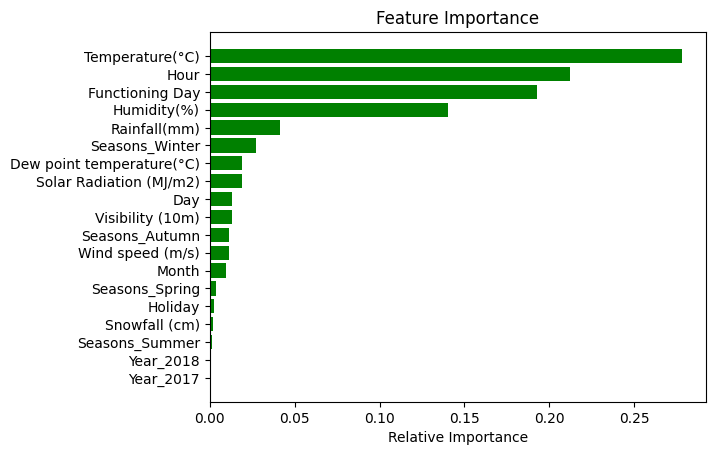

In [80]:
#Ploting important features
# define X and y
X = transformed_df.drop('Rented Bike Count', axis=1)
y = transformed_df['Rented Bike Count']

# train Random Forest model
rf = RandomForestRegressor()
rf.fit(X, y)

# Get the feature importances from the best Random Forest model
important_features= rf.feature_importances_
features= X.columns

indices = np.argsort(important_features)

plt.title('Feature Importance')
plt.barh(range(len(indices)), important_features[indices], color='Green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Here XG Boost algorithm used with Yeo-Johnson transformed dataframe along with SHAP as model explainability tool.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.4 MB/s eta 0:00:00


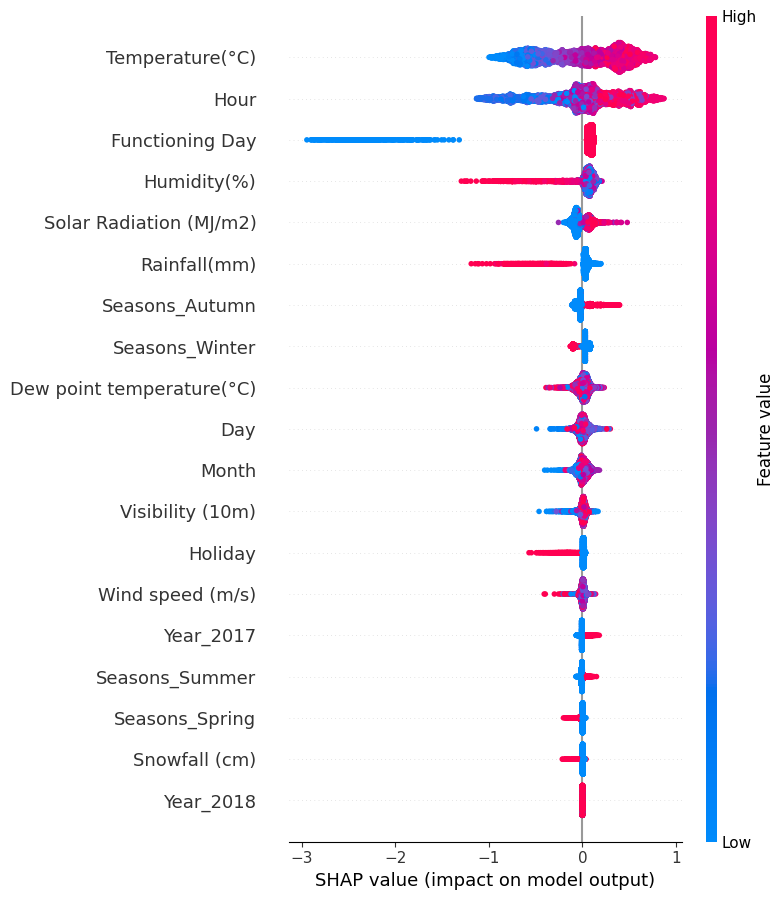

In [81]:
#Installing the shap library
!pip install shap
import shap

# Train XGBoost model
x_train = transformed_df.drop(columns=['Rented Bike Count'])  # Your transformed features (excluding the target variable)
y_train = transformed_df['Rented Bike Count']  # Your target variable
model = xgb.XGBRegressor()
model.fit(x_train, y_train)

# Create a SHAP explainer object
explainer = shap.Explainer(model)

# Calculate SHAP values for the entire dataset
shap_values = explainer.shap_values(x_train)
# Generate the summary plot
shap.summary_plot(shap_values, x_train)
plt.show()

Feature Importance: Here SHAP identified the most important features like Temperature and hour in a model by indicating their contributions in prediction process.


# **Conclusion**

EDA insights:
- The Summer season sees the highest bike rentals, while the winter season has the lowest.
- More than 59% of bike rentals occur on non-holiday days.
- Bike rentals peak in the temperature range of 15 to 30 degrees.
- Bike rentals are more frequent on days without snowfall or rainfall.
- A significant proportion of bike rentals occur when humidity levels range from 30 to 70%.
- High visibility conditions are associated with a greater number of bike rentals.
- On non-holiday days, the average number of bike rentals is higher compared to holidays.
- There is no bike rental on non functional day whereas 730 bikes are rented on functional days.
- March and June have highest bike rentals counts while April and July recorded no rentals.

ML Model Results:

### **Best performing model**

**XG Boost** algorithm gives the best result with **Yeo-Johnson**  transformated DataFrame indicating 

* R2 Score: 0.9125020134117153
* MSE: 0.08710730048032775
* RMSE of 0.29513945937527186





### **Worst performing model**

**Lasso Regression** algorithm gives the worst result with **Yeo-Johnson**  transformated DataFrame indicating 

* R2 Score: -0.0012936712992999144
* MSE: 0.9968228081101558 
* RMSE of 0.9984101402280307